In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import time
import seaborn as sns
%matplotlib inline
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly import subplots
from sklearn.cluster import Birch, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler  

## Q1. Number of Facilities in different states and Indiana cities

In [2]:
dfstpop = pd.read_csv("USSTATEPOP_2020.csv", usecols=[0,1,5])
dfstpop = pd.DataFrame(dfstpop)
dfstpop.head()
#dfstpop.info()

dfstpop1 = pd.read_csv("USSTATEPOP_2020.csv", usecols=[1,5])
dfstpop1.head()

State_Abbr   Pop_2020
0         US  331449281
1         CA   39538223
2         TX   29145505
3         FL   21538187
4         NY   20201249

In [3]:
dfctpop = pd.read_csv("CITY_POP_2020.csv", usecols=[0,1,2,4])
dfctpop = pd.DataFrame(dfctpop)
dfctpop.head()
#dfctpop.info()

CITY    STATE STATE_ABBR  POPEST2020
0   Abbeville  Alabama         AL        2368
1  Adamsville  Alabama         AL        4356
2     Addison  Alabama         AL         664
3       Akron  Alabama         AL         227
4     Alabama  Alabama         AL     5024803

In [4]:
dfctpopin=dfctpop[dfctpop['STATE_ABBR']== 'IN']
dfctpopin.head()
#dfctpopin.info()

CITY    STATE STATE_ABBR  POPEST2020
7301  Abingtonship  Indiana         IN         795
7302    Aboiteship  Indiana         IN       42165
7303  Adams County  Indiana         IN       35826
7304     Adamsship  Indiana         IN       34175
7305   Addisonship  Indiana         IN       21443

In [120]:
#Inpatient Facilites by State

dfihp = pd.read_csv("Inpatient_2020_PrvSrv.csv")
dfihp = pd.DataFrame(dfihp)
dfihp.head()
#dfihp.info()

dfihp1 = dfihp['Prv_State'].value_counts().reset_index()
print(dfihp1.head())

fig1 = go.Figure(data=go.Choropleth(
    locations=dfihp1['index'], 
    z = dfihp1['Prv_State'], 
    locationmode = 'USA-states', 
    colorscale = 'Blues',
    colorbar_title = "Number of Facilities",
))

fig1.update_layout(
    title_text = 'Inpatient Facilities in Different States',
    geo_scope='usa',
)

fig1.show()

  index  Prv_State
0    CA      13146
1    FL      12813
2    TX      11436
3    NY       9119
4    PA       7667


In [6]:
#Inpatient Facilites by State normalized to population

newihp1 = pd.merge(dfihp1, dfstpop1, how='left', left_on=['index'], right_on = ['State_Abbr'])
newihp1.insert(loc=4, column="IHP_RATIO", value=((newihp1['Prv_State']/newihp1['Pop_2020'])*1000000))
print(newihp1.head())
#newihp1.info()

fig2 = go.Figure(data=go.Choropleth(
    locations=newihp1['State_Abbr'], 
    z = newihp1['IHP_RATIO'], 
    locationmode = 'USA-states', 
    colorscale = 'Blues',
    colorbar_title = "FACILITES to STATE POPULATION RATIO * (10^6)",
))

fig2.update_layout(
    title_text = 'Inpatient Facilities in Different States (Normalized with State Population data)',
    geo_scope='usa',
)

fig2.show()

  index  Prv_State State_Abbr  Pop_2020   IHP_RATIO
0    CA      13146         CA  39538223  332.488387
1    FL      12813         FL  21538187  594.896869
2    TX      11436         TX  29145505  392.376114
3    NY       9119         NY  20201249  451.407732
4    PA       7667         PA  13002700  589.646766


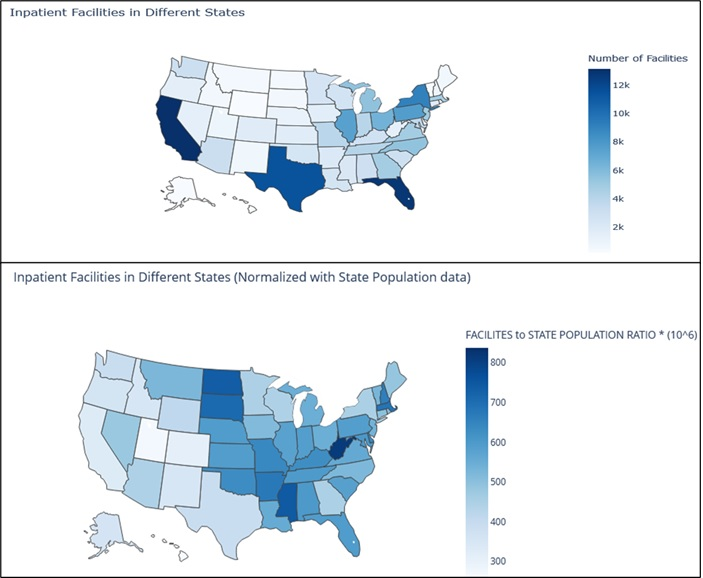

In [ ]:
### Conclusion: 

In [7]:
#Outpatient Facilites by State

dfopd = pd.read_csv("Outpatient_2020_PrvSrv.csv")
dfopd = pd.DataFrame(dfopd)
dfopd.head()
#dfopd.info()

dfopd1 = dfopd['Prv_State'].value_counts().reset_index()

fig = go.Figure(data=go.Choropleth(
    locations=dfopd1['index'], 
    z = dfopd1['Prv_State'], 
    locationmode = 'USA-states', 
    colorscale = 'Greens',
    colorbar_title = "Number of Facilities",
))

fig.update_layout(
    title_text = 'Outpatient Facilities in Different States',
    geo_scope='usa',
)

fig.show()

In [8]:
#Outpatient Facilites by State normalized to population
                      
newopd1 = pd.merge(dfopd1, dfstpop1, how='left', left_on=['index'], right_on = ['State_Abbr'])
newopd1.insert(loc=4, column="OPD_RATIO", value=((newopd1['Prv_State']/newopd1['Pop_2020'])*1000000))
print(newopd1.head())
#newopd1.info()


fig = go.Figure(data=go.Choropleth(
    locations=newopd1['State_Abbr'], 
    z = newopd1['OPD_RATIO'], 
    locationmode = 'USA-states', 
    colorscale = 'Greens',
    colorbar_title = "FACILITES to STATE POPULATION RATIO * (10^6)",
))

fig.update_layout(
    title_text = 'Outpatient Facilities in Different States (Normalized with State Population data)',
    geo_scope='usa',
)

fig.show()

  index  Prv_State State_Abbr  Pop_2020   OPD_RATIO
0    CA      10441         CA  39538223  264.073578
1    TX       9797         TX  29145505  336.141028
2    FL       7096         FL  21538187  329.461342
3    PA       5479         PA  13002700  421.374022
4    NY       5379         NY  20201249  266.270665


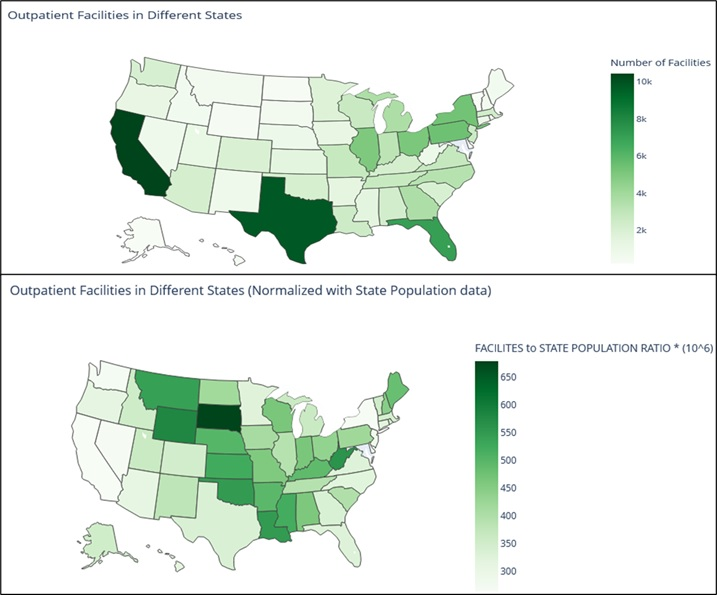

In [ ]:
### Conclusion: 

In [9]:
#SNF Facilites by State

dfsnf = pd.read_csv("PACSNF_2020v2.csv")
dfsnf = pd.DataFrame(dfsnf)
dfsnf.head()
#dfsnf.info()

dfsnf1 = dfsnf['STATE'].value_counts().reset_index()

fig = go.Figure(data=go.Choropleth(
    locations=dfsnf1['index'], 
    z = dfsnf1['STATE'].astype(float),
    locationmode = 'USA-states', 
    colorscale = 'Reds',
    colorbar_title = "Number of Facilities",
))

fig.update_layout(
    title_text = 'Skilled Nursing Facilities in Different States',
    geo_scope='usa', 
)

fig.show()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning:

Columns (4,8) have mixed types.Specify dtype option on import or set low_memory=False.



In [10]:
#SNF Facilites by State normalized to population

newsnf1 = pd.merge(dfsnf1, dfstpop1, how='left', left_on=['index'], right_on = ['State_Abbr'])
newsnf1.insert(loc=4, column="SNF_RATIO", value=((newsnf1['STATE']/newsnf1['Pop_2020'])*1000000))
print(newsnf1.head())
#newsnf1.info()


fig = go.Figure(data=go.Choropleth(
    locations=newsnf1['State_Abbr'], 
    z = newsnf1['SNF_RATIO'].astype(float),
    locationmode = 'USA-states', 
    colorscale = 'Reds',
    colorbar_title = "FACILITES to STATE POPULATION RATIO * (10^6)",
))

fig.update_layout(
    title_text = 'Skilled Nursing Facilities in Different States (Normalized with State Population data)',
    geo_scope='usa', 
)

fig.show()

  index  STATE State_Abbr    Pop_2020  SNF_RATIO
0    TX   1192         TX  29145505.0  40.898245
1    CA   1082         CA  39538223.0  27.365924
2    OH    917         OH  11799448.0  77.715500
3    FL    704         FL  21538187.0  32.686131
4    PA    685         PA  13002700.0  52.681366


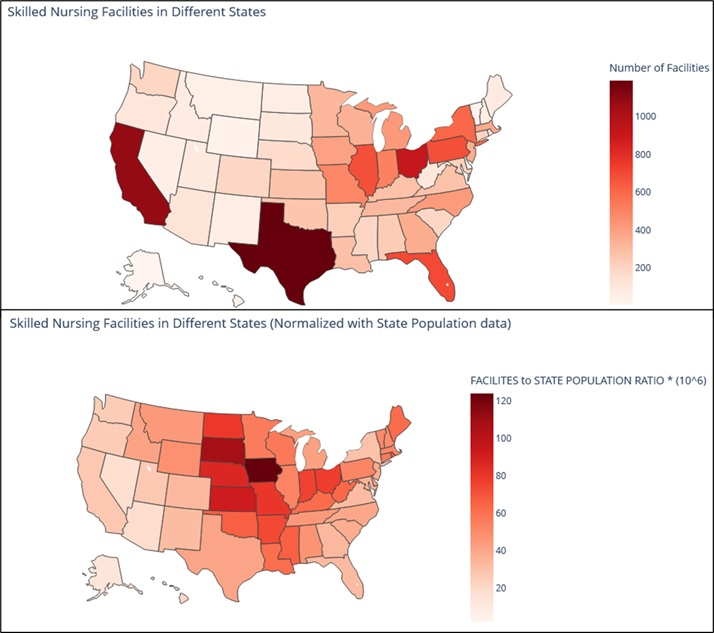

In [ ]:
### Conclusion: 

In [11]:
#Hospice Facilites by State

dfhos = pd.read_csv("PACHOS_2020v2.csv")
dfhos = pd.DataFrame(dfhos)
dfhos.head()
#dfhos.info()

dfhos1 = dfhos['STATE'].value_counts().reset_index()

fig = go.Figure(data=go.Choropleth(
    locations=dfhos1['index'], 
    z = dfhos1['STATE'].astype(float),
    locationmode = 'USA-states', 
    colorscale = 'Greens',
    colorbar_title = "Number of Facilities",
))

fig.update_layout(
    title_text = 'Hospice Facilities in Different States',
    geo_scope='usa', 
)

fig.show()

In [12]:
#Hospice Facilites by State normalized to population

newhos1 = pd.merge(dfhos1, dfstpop1, how='left', left_on=['index'], right_on = ['State_Abbr'])
newhos1.insert(loc=4, column="HSP_RATIO", value=((newhos1['STATE']/newhos1['Pop_2020'])*1000000))
print(newhos1.head())
#newhos1.info()


fig = go.Figure(data=go.Choropleth(
    locations=newhos1['State_Abbr'], 
    z = newhos1['HSP_RATIO'].astype(float),
    locationmode = 'USA-states', 
    colorscale = 'Greens',
    colorbar_title = "FACILITES to STATE POPULATION RATIO * (10^6)",
))

fig.update_layout(
    title_text = 'Hospice Facilities in Different States (Normalized with State Population data)',
    geo_scope='usa', 
)

fig.show()

  index  STATE State_Abbr    Pop_2020  HSP_RATIO
0    CA   1020         CA  39538223.0  25.797821
1    TX    613         TX  29145505.0  21.032403
2    GA    203         GA  10711908.0  18.950872
3    PA    176         PA  13002700.0  13.535650
4    AZ    146         AZ   7151502.0  20.415292


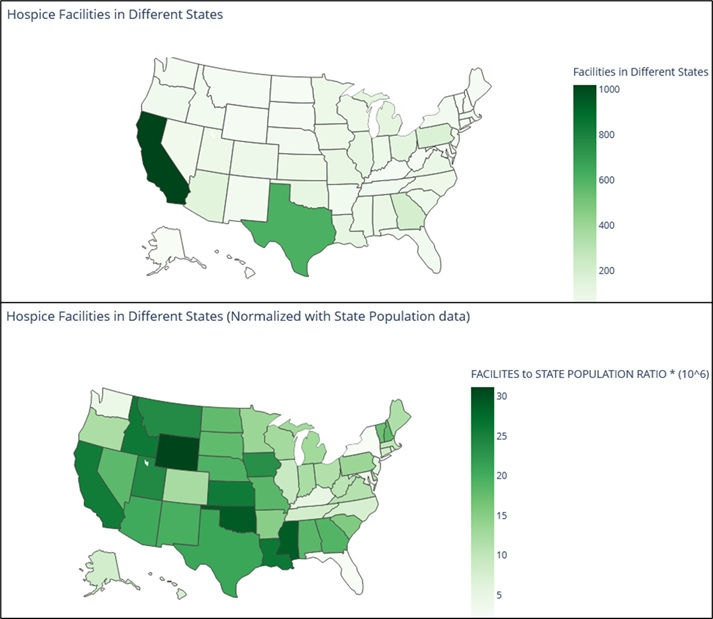

In [ ]:
### Conclusion: 

In [13]:
# Home Health Facilites by State normalized to population

dfhh = pd.read_csv("PACHH_2020V2.csv")
dfhh = pd.DataFrame(dfhh)
dfhh.head()

dfhh1 = dfhh['STATE'].value_counts().reset_index()

newhh1 = pd.merge(dfhh1, dfstpop1, how='left', left_on=['index'], right_on = ['State_Abbr'])
newhh1.insert(loc=4, column="HH_RATIO", value=((newhh1['STATE']/newhh1['Pop_2020'])*1000000))
print(newhh1.head())
#newhh1.info()


fig = go.Figure(data=go.Choropleth(
    locations=newhh1['State_Abbr'], 
    z = newhh1['HH_RATIO'].astype(float),
    locationmode = 'USA-states', 
    colorscale = 'Reds',
    colorbar_title = "FACILITES to STATE POPULATION RATIO * (10^6)",
))

fig.update_layout(
    title_text = 'Home Health Facilities in Different States (Normalized with State Population data)',
    geo_scope='usa', 
)

fig.show()

  index  STATE State_Abbr    Pop_2020   HH_RATIO
0    TX   1425         TX  29145505.0  48.892617
1    CA   1419         CA  39538223.0  35.889322
2    FL    772         FL  21538187.0  35.843314
3    IL    515         IL  12812508.0  40.195097
4    MI    370         MI  10077331.0  36.716071


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning:

Columns (4,8) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
### Conclusion: 

In [14]:
# Inpatient Rehab Facilites by State normalized to population

dfirf = pd.read_csv("PACIRF_2020V2.csv")
dfirf = pd.DataFrame(dfirf)
dfirf.head()

dfirf1 = dfirf['STATE'].value_counts().reset_index()

newirf1 = pd.merge(dfirf1, dfstpop1, how='left', left_on=['index'], right_on = ['State_Abbr'])
newirf1.insert(loc=4, column="IRF_RATIO", value=((newirf1['STATE']/newirf1['Pop_2020'])*1000000))
print(newirf1.head())
#newirf1.info()

fig = go.Figure(data=go.Choropleth(
    locations=newirf1['State_Abbr'], 
    z = newirf1['IRF_RATIO'].astype(float),
    locationmode = 'USA-states', 
    colorscale = 'Greens',
    colorbar_title = "FACILITES to STATE POPULATION RATIO * (10^6)",
))

fig.update_layout(
    title_text = 'Inpatient Rehab Facilities in Different States (Normalized with State Population data)',
    geo_scope='usa', 
)

fig.show()

  index  STATE State_Abbr    Pop_2020  IRF_RATIO
0    TX    130         TX  29145505.0   4.460379
1    CA     76         CA  39538223.0   1.922191
2    PA     71         PA  13002700.0   5.460404
3    FL     52         FL  21538187.0   2.414316
4    LA     50         LA   4657757.0  10.734781


In [ ]:
### Conclusion: 

In [16]:
# Longterm Care Facilites by State

dfltc = pd.read_csv("PACLTC_2020V2.csv")
dfltc = pd.DataFrame(dfltc)
dfltc.head()

dfltc1 = dfltc['STATE'].value_counts().reset_index()

newltc1 = pd.merge(dfltc1, dfstpop1, how='left', left_on=['index'], right_on = ['State_Abbr'])
newltc1.insert(loc=4, column="IRF_RATIO", value=((newltc1['STATE']/newltc1['Pop_2020'])*1000000))
print(newltc1.head())
#newltc1.info()

fig = go.Figure(data=go.Choropleth(
    locations=newltc1['State_Abbr'], 
    z = newltc1['IRF_RATIO'].astype(float),
    locationmode = 'USA-states', 
    colorscale = 'Blues',
    colorbar_title = "FACILITES to STATE POPULATION RATIO * (10^6)",
))

fig.update_layout(
    title_text = 'Longterm Care Facilities in Different States (Normalized with State Population data)',
    geo_scope='usa', 
)

fig.show()

  index  STATE State_Abbr    Pop_2020  IRF_RATIO
0    TX     58         TX  29145505.0   1.990015
1    LA     27         LA   4657757.0   5.796782
2    FL     24         FL  21538187.0   1.114300
3    OH     21         OH  11799448.0   1.779744
4    CA     21         CA  39538223.0   0.531132


In [ ]:
### Conclusion: 

### Indiana State Level Facilities Distribution

In [17]:
dfctpopin2 = pd.DataFrame().assign(CITY=dfctpopin['CITY'], POPEST2020=dfctpopin['POPEST2020'])
dfctpopin2.head()

CITY  POPEST2020
7301  Abingtonship         795
7302    Aboiteship       42165
7303  Adams County       35826
7304     Adamsship       34175
7305   Addisonship       21443

In [18]:
dfihp_ct=dfihp[dfihp['Prv_State']== 'IN']
dfihp_ct.head()
dfihp_ct2 = dfihp_ct['Prv_City'].value_counts().reset_index(name='Prv_City').sort_values(['Prv_City'], ascending=False)
#print(dfihp_ct2.head())

newihp2 = pd.merge(dfihp_ct2, dfctpopin2, how='left', left_on=['index'], right_on = ['CITY'])
newihp2.insert(loc=4, column="IHP_RATIO", value=((newihp2['Prv_City']/newihp2['POPEST2020'])*10000))
print(newihp2.head())


          index  Prv_City          CITY  POPEST2020  IHP_RATIO
0  Indianapolis       839  Indianapolis    896749.0   9.356018
1    Evansville       310    Evansville    117258.0  26.437429
2    Fort Wayne       307    Fort Wayne    264169.0  11.621348
3       Munster       165       Munster     23895.0  69.052103
4     Lafayette       148     Lafayette     70809.0  20.901298


          index  Prv_City          CITY  POPEST2020  IHP_RATIO
0  Indianapolis       839  Indianapolis    896749.0   9.356018
1    Evansville       310    Evansville    117258.0  26.437429
2    Fort Wayne       307    Fort Wayne    264169.0  11.621348
3       Munster       165       Munster     23895.0  69.052103
4     Lafayette       148     Lafayette     70809.0  20.901298


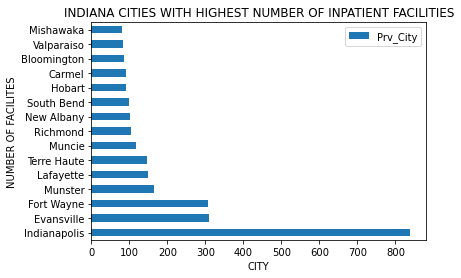

In [18]:
#Inpatient Facilites In Indiana State

newihp3 = newihp2.sort_values(by = 'Prv_City', ascending=False)
newihp3 = newihp3.head(15)
print(newihp3.head())

newihp3.plot.barh('CITY','Prv_City')
plt.xlabel('CITY')
plt.ylabel('NUMBER OF FACILITES')
plt.title('INDIANA CITIES WITH HIGHEST NUMBER OF INPATIENT FACILITIES')
plt.show()

           index  Prv_City          CITY  POPEST2020  IHP_RATIO
3        Munster       165       Munster     23895.0  69.052103
33  Lawrenceburg        30  Lawrenceburg      5102.0  58.800470
27      Danville        41      Danville     10594.0  38.701152
23     Vincennes        54     Vincennes     16776.0  32.188841
10        Hobart        92        Hobart     29669.0  31.008797


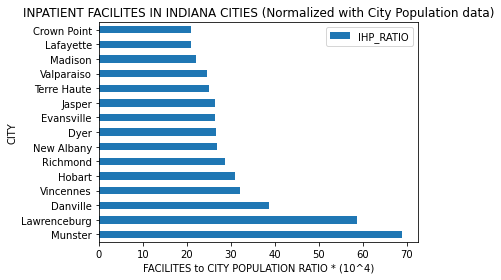

In [19]:
#Inpatient Facilites In Indiana State normalized to population

newihp4 = newihp2.sort_values(by = 'IHP_RATIO', ascending=False)
newihp4 = newihp4.head(15)
print(newihp4.head())

newihp4.plot.barh('CITY','IHP_RATIO')
plt.xlabel('FACILITES to CITY POPULATION RATIO * (10^4)')
plt.ylabel('CITY')
plt.yticks(fontsize = 10)
plt.title('INPATIENT FACILITES IN INDIANA CITIES (Normalized with City Population data)')
plt.tight_layout()
plt.show()

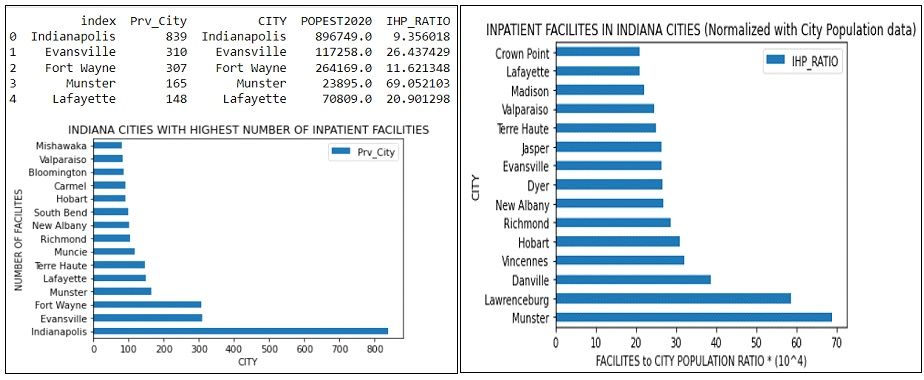

In [ ]:
### Conclusion: 

In [20]:
dfopd_ct=dfopd[dfopd['Prv_State']== 'IN']
dfopd_ct.head()
dfopd_ct2 = dfopd_ct['Prv_City'].value_counts().reset_index(name='Prv_City').sort_values(['Prv_City'], ascending=False)
#print(dfopd_ct2.head())

newopd2 = pd.merge(dfopd_ct2, dfctpopin2, how='left', left_on=['index'], right_on = ['CITY'])
newopd2.insert(loc=4, column="OPD_CITY_RATIO", value=((newopd2['Prv_City']/newopd2['POPEST2020'])*10000))
print(newopd2.head())

          index  Prv_City          CITY  POPEST2020  OPD_CITY_RATIO
0  Indianapolis       376  Indianapolis    896749.0        4.192924
1    Fort Wayne       186    Fort Wayne    264169.0        7.040947
2    Evansville       120    Evansville    117258.0       10.233843
3       Munster       115       Munster     23895.0       48.127223
4        Carmel       101        Carmel     99892.0       10.110920


          index  Prv_City          CITY  POPEST2020  OPD_CITY_RATIO
0  Indianapolis       376  Indianapolis    896749.0        4.192924
1    Fort Wayne       186    Fort Wayne    264169.0        7.040947
2    Evansville       120    Evansville    117258.0       10.233843
3       Munster       115       Munster     23895.0       48.127223
4        Carmel       101        Carmel     99892.0       10.110920


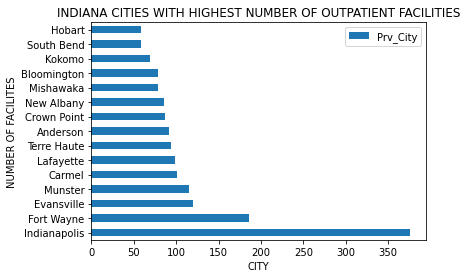

In [21]:
#Outpatient Facilites In Indiana State 

newopd3 = newopd2.sort_values(by = 'Prv_City', ascending=False)
newopd3 = newopd3.head(15)
print(newopd3.head())

newopd3.plot.barh('CITY','Prv_City')
plt.xlabel('CITY')
plt.ylabel('NUMBER OF FACILITES')
plt.title('INDIANA CITIES WITH HIGHEST NUMBER OF OUTPATIENT FACILITIES')
plt.show()

           index  Prv_City          CITY  POPEST2020  OPD_CITY_RATIO
36  Lawrenceburg        36  Lawrenceburg      5102.0       70.560564
52      Newburgh        17      Newburgh      3358.0       50.625372
3        Munster       115       Munster     23895.0       48.127223
53          Knox        15          Knox      3587.0       41.817675
28      Danville        42      Danville     10594.0       39.645082


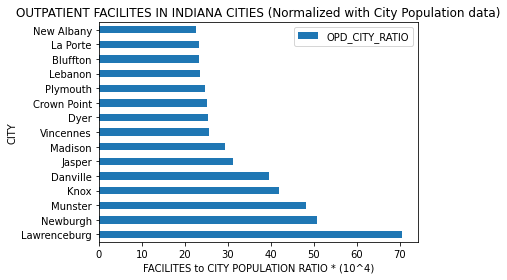

In [22]:
#Outpatient Facilites In Indiana State normalized to population

newopd4 = newopd2.sort_values(by = 'OPD_CITY_RATIO', ascending=False)
newopd4 = newopd4.head(15)
print(newopd4.head())

newopd4.plot.barh('CITY','OPD_CITY_RATIO')
plt.xlabel('FACILITES to CITY POPULATION RATIO * (10^4)')
plt.ylabel('CITY')
plt.yticks(fontsize = 10)
plt.title('OUTPATIENT FACILITES IN INDIANA CITIES (Normalized with City Population data)')
plt.tight_layout()
plt.show()

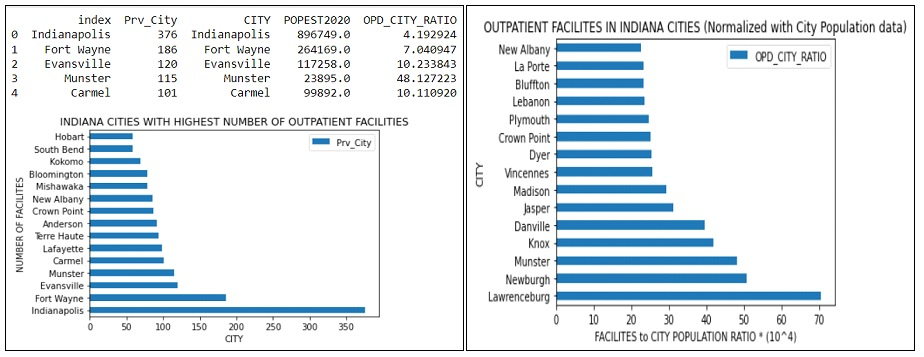

In [ ]:
### Conclusion: 

In [26]:
dfctpopin3 = pd.DataFrame().assign(CITY=dfctpopin['CITY'], POPEST2020=dfctpopin['POPEST2020'])
dfctpopin3.insert(loc=1, column="CITY2", value=dfctpopin3['CITY'].str.lower())
dfctpopin3.head()

CITY         CITY2  POPEST2020
7301  Abingtonship  abingtonship         795
7302    Aboiteship    aboiteship       42165
7303  Adams County  adams county       35826
7304     Adamsship     adamsship       34175
7305   Addisonship   addisonship       21443

In [27]:
snf_ct=dfsnf[dfsnf['STATE']== 'IN']
snf_ct.head()
snf_ct2 = snf_ct['PRVDR_CITY'].value_counts().reset_index(name='PRVDR_CITY').sort_values(['PRVDR_CITY'], ascending=False)
snf_ct2.insert(loc=1, column="CITY_NAME", value=snf_ct2['index'].str.lower())

newsnf2 = pd.merge(snf_ct2, dfctpopin3, how='left', left_on=['CITY_NAME'], right_on = ['CITY2'])
newsnf2.insert(loc=4, column="SNF_CITY_RATIO", value=((newsnf2['PRVDR_CITY']/newsnf2['POPEST2020'])*10000))
print(newsnf2.head())

          index     CITY_NAME  PRVDR_CITY          CITY  SNF_CITY_RATIO  \
0  INDIANAPOLIS  indianapolis          47  Indianapolis        0.524115   
1    FORT WAYNE    fort wayne          27    Fort Wayne        1.022073   
2    EVANSVILLE    evansville          17    Evansville        1.449794   
3    SOUTH BEND    south bend          10    South Bend        0.965932   
4        MUNCIE        muncie          10        Muncie        1.532778   

          CITY2  POPEST2020  
0  indianapolis    896749.0  
1    fort wayne    264169.0  
2    evansville    117258.0  
3    south bend    103527.0  
4        muncie     65241.0  


           CITY  NO_OF_FACILITIES
0  INDIANAPOLIS                47
1    FORT WAYNE                27
2    EVANSVILLE                17
3    SOUTH BEND                10
4        MUNCIE                10


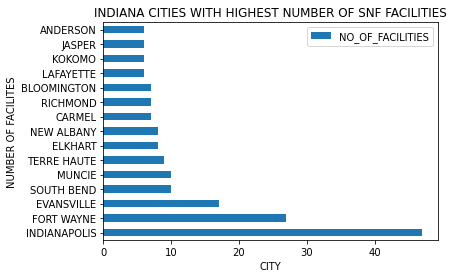

In [25]:
#SNF Facilites In Indiana State 

newsnf3 = newsnf2.sort_values(by = 'PRVDR_CITY', ascending=False)
newsnf3 = newsnf3.head(15)
newsnf4 = pd.DataFrame().assign(CITY=newsnf3['index'], NO_OF_FACILITIES=newsnf3['PRVDR_CITY'])
print(newsnf4.head())

newsnf4.plot.barh('CITY','NO_OF_FACILITIES')
plt.xlabel('CITY')
plt.ylabel('NUMBER OF FACILITES')
plt.title('INDIANA CITIES WITH HIGHEST NUMBER OF SNF FACILITIES')
plt.show()

             CITY  NO_OF_FACILITIES  SNF_CITY_RATIO  POPEST2020
144   LEAVENWORTH                 1       37.878788       264.0
179       OAKTOWN                 1       17.271157       579.0
20       NEWBURGH                 5       14.889815      3358.0
102   NEW HARMONY                 1       14.577259       686.0
132  KNIGHTSVILLE                 1       14.513788       689.0


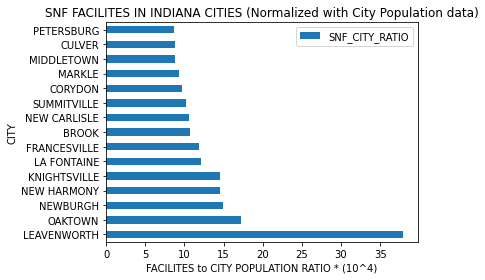

In [28]:
#SNF Facilites In Indiana State normalized to population

newsnf5 = newsnf2.sort_values(by = 'SNF_CITY_RATIO', ascending=False)
newsnf5 = newsnf5.head(15)
newsnf6 = pd.DataFrame().assign(CITY=newsnf5['index'], NO_OF_FACILITIES=newsnf5['PRVDR_CITY'], SNF_CITY_RATIO=newsnf5['SNF_CITY_RATIO'], POPEST2020=newsnf5['POPEST2020'])
print(newsnf6.head())

newsnf6.plot.barh('CITY','SNF_CITY_RATIO')
plt.xlabel('FACILITES to CITY POPULATION RATIO * (10^4)')
plt.ylabel('CITY')
plt.yticks(fontsize = 10)
plt.title('SNF FACILITES IN INDIANA CITIES (Normalized with City Population data)')
plt.tight_layout()
plt.show()



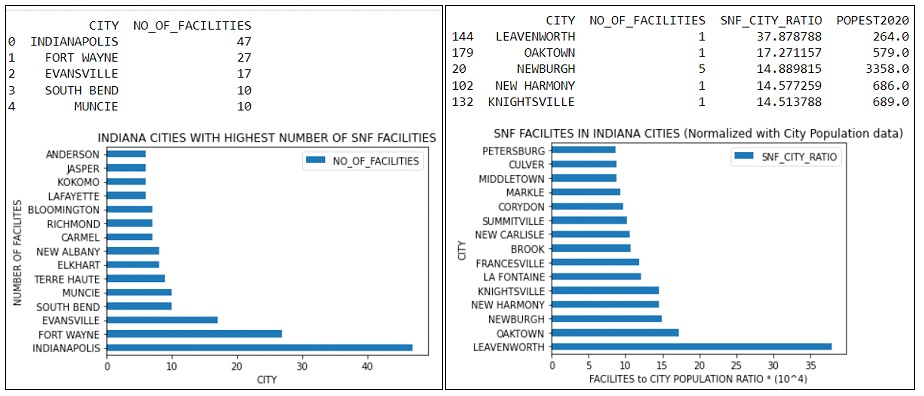

In [ ]:
### Conclusion: 

In [29]:
hos_ct=dfhos[dfhos['STATE']== 'IN']
hos_ct.head()
hos_ct2 = hos_ct['PRVDR_CITY'].value_counts().reset_index(name='PRVDR_CITY').sort_values(['PRVDR_CITY'], ascending=False)
hos_ct2.insert(loc=1, column="CITY_NAME", value=hos_ct2['index'].str.lower())
hos_ct2.head()

newhos2 = pd.merge(hos_ct2, dfctpopin3, how='left', left_on=['CITY_NAME'], right_on = ['CITY2'])
newhos2.insert(loc=4, column="HSP_CITY_RATIO", value=((newhos2['PRVDR_CITY']/newhos2['POPEST2020'])*10000))
print(newhos2.head())

          index     CITY_NAME  PRVDR_CITY          CITY  HSP_CITY_RATIO  \
0  INDIANAPOLIS  indianapolis          18  Indianapolis        0.200725   
1    EVANSVILLE    evansville           5    Evansville        0.426410   
2    FORT WAYNE    fort wayne           5    Fort Wayne        0.189273   
3   TERRE HAUTE   terre haute           4   Terre Haute        0.683258   
4     MISHAWAKA     mishawaka           3     Mishawaka        0.586786   

          CITY2  POPEST2020  
0  indianapolis    896749.0  
1    evansville    117258.0  
2    fort wayne    264169.0  
3   terre haute     58543.0  
4     mishawaka     51126.0  


           CITY  NO_OF_FACILITIES
0  INDIANAPOLIS                18
2    FORT WAYNE                 5
1    EVANSVILLE                 5
3   TERRE HAUTE                 4
4     MISHAWAKA                 3


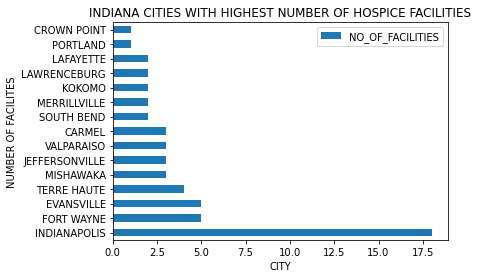

In [30]:
#Hospice Facilites In Indiana State

newhos3 = newhos2.sort_values(by = 'PRVDR_CITY', ascending=False)
newhos3 = newhos3.head(15)
newhos4 = pd.DataFrame().assign(CITY=newhos3['index'], NO_OF_FACILITIES=newhos3['PRVDR_CITY'])
print(newhos4.head())

newhos4.plot.barh('CITY','NO_OF_FACILITIES')
plt.xlabel('CITY')
plt.ylabel('NUMBER OF FACILITES')
plt.title('INDIANA CITIES WITH HIGHEST NUMBER OF HOSPICE FACILITIES')
plt.show()

            CITY  NO_OF_FACILITIES  HSP_CITY_RATIO  POPEST2020
10  LAWRENCEBURG                 2        3.920031      5102.0
30      MITCHELL                 1        2.544529      3930.0
36         BERNE                 1        2.414876      4141.0
39     ROCHESTER                 1        1.592357      6280.0
34      PORTLAND                 1        1.589320      6292.0


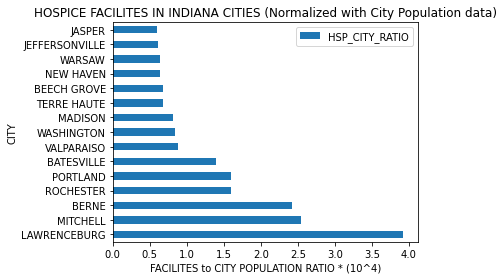

In [31]:
#Hospice Facilites In Indiana State normalized to population

newhos5 = newhos2.sort_values(by = 'HSP_CITY_RATIO', ascending=False)
newhos5 = newhos5.head(15)
newhos6 = pd.DataFrame().assign(CITY=newhos5['index'], NO_OF_FACILITIES=newhos5['PRVDR_CITY'], HSP_CITY_RATIO=newhos5['HSP_CITY_RATIO'], POPEST2020=newhos5['POPEST2020'])
print(newhos6.head())

newhos6.plot.barh('CITY','HSP_CITY_RATIO')
plt.ylabel('CITY')
plt.xlabel('FACILITES to CITY POPULATION RATIO * (10^4)')
plt.yticks(fontsize = 10)
plt.title('HOSPICE FACILITES IN INDIANA CITIES (Normalized with City Population data)')
plt.tight_layout()
plt.show()

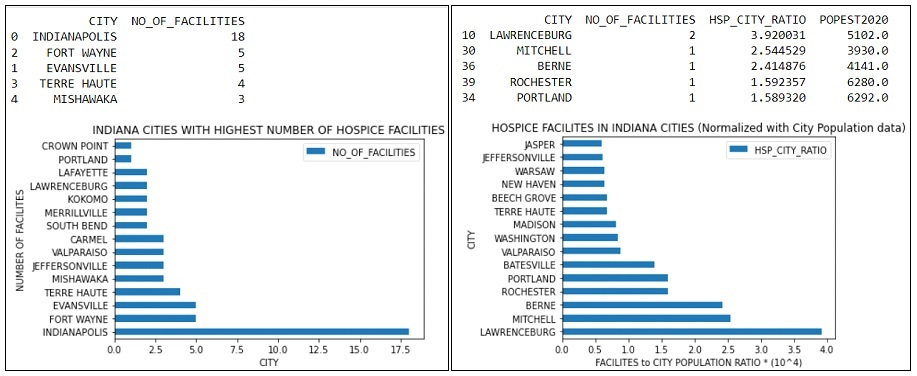

In [ ]:
### Conclusion:

In [32]:
hh_ct=dfhh[dfhh['STATE']== 'IN']
hh_ct.head()
hh_ct2 = hh_ct['PRVDR_CITY'].value_counts().reset_index(name='PRVDR_CITY').sort_values(['PRVDR_CITY'], ascending=False)
hh_ct2.insert(loc=1, column="CITY_NAME", value=hh_ct2['index'].str.lower())
hh_ct2.head()

newhh2 = pd.merge(hh_ct2, dfctpopin3, how='left', left_on=['CITY_NAME'], right_on = ['CITY2'])
newhh2.insert(loc=4, column="HH_CITY_RATIO", value=((newhh2['PRVDR_CITY']/newhh2['POPEST2020'])*10000))
newhh2.head()

index     CITY_NAME  PRVDR_CITY          CITY  HH_CITY_RATIO  \
0  INDIANAPOLIS  indianapolis          21  Indianapolis       0.234179   
1  MERRILLVILLE  merrillville          13  Merrillville       3.552786   
2      HIGHLAND      highland          11      Highland       4.612740   
3    FORT WAYNE    fort wayne           8    Fort Wayne       0.302836   
4       MUNSTER       munster           7       Munster       2.929483   

          CITY2  POPEST2020  
0  indianapolis    896749.0  
1  merrillville     36591.0  
2      highland     23847.0  
3    fort wayne    264169.0  
4       munster     23895.0

            CITY  NO_OF_FACILITIES  HH_CITY_RATIO  POPEST2020
2       HIGHLAND                11       4.612740     23847.0
26  LAWRENCEBURG                 2       3.920031      5102.0
52    BROOKVILLE                 1       3.816794      2620.0
1   MERRILLVILLE                13       3.552786     36591.0
66      BICKNELL                 1       3.312355      3019.0


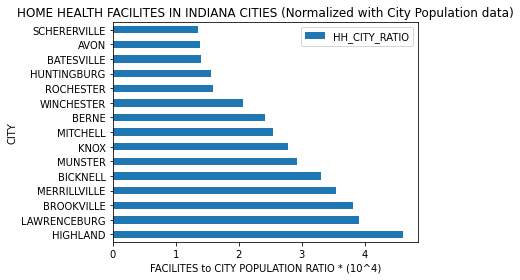

In [33]:
#Home Health Facilites In Indiana State normalized to population

newhh3 = newhh2.sort_values(by = 'HH_CITY_RATIO', ascending=False)
newhh3 = newhh3.head(15)
newhh4 = pd.DataFrame().assign(CITY=newhh3['index'], NO_OF_FACILITIES=newhh3['PRVDR_CITY'], HH_CITY_RATIO=newhh3['HH_CITY_RATIO'], POPEST2020=newhh3['POPEST2020'])
print(newhh4.head())

newhh4.plot.barh('CITY','HH_CITY_RATIO')
plt.ylabel('CITY')
plt.xlabel('FACILITES to CITY POPULATION RATIO * (10^4)')
plt.yticks(fontsize = 10)
plt.title('HOME HEALTH FACILITES IN INDIANA CITIES (Normalized with City Population data)')
plt.tight_layout()
plt.show()

In [ ]:
### Conclusion:

In [34]:
irf_ct=dfirf[dfirf['STATE']== 'IN']
irf_ct.head()
irf_ct2 = irf_ct['PRVDR_CITY'].value_counts().reset_index(name='PRVDR_CITY').sort_values(['PRVDR_CITY'], ascending=False)
irf_ct2.insert(loc=1, column="CITY_NAME", value=irf_ct2['index'].str.lower())
irf_ct2.head()

newirf2 = pd.merge(irf_ct2, dfctpopin3, how='left', left_on=['CITY_NAME'], right_on = ['CITY2'])
newirf2.insert(loc=4, column="IRF_CITY_RATIO", value=((newirf2['PRVDR_CITY']/newirf2['POPEST2020'])*10000))
newirf2.head()

index     CITY_NAME  PRVDR_CITY          CITY  IRF_CITY_RATIO  \
0  INDIANAPOLIS  indianapolis           3  Indianapolis        0.033454   
1     LAFAYETTE     lafayette           2     Lafayette        0.282450   
2    FORT WAYNE    fort wayne           2    Fort Wayne        0.075709   
3   TERRE HAUTE   terre haute           2   Terre Haute        0.341629   
4        KOKOMO        kokomo           2        Kokomo        0.335537   

          CITY2  POPEST2020  
0  indianapolis    896749.0  
1     lafayette     70809.0  
2    fort wayne    264169.0  
3   terre haute     58543.0  
4        kokomo     59606.0

          CITY  NO_OF_FACILITIES  IRF_CITY_RATIO  POPEST2020
23    NEWBURGH                 1        2.977963      3358.0
18  WASHINGTON                 1        0.834028     11990.0
19        DYER                 1        0.604887     16532.0
26      JASPER                 1        0.597836     16727.0
5    VINCENNES                 1        0.596090     16776.0


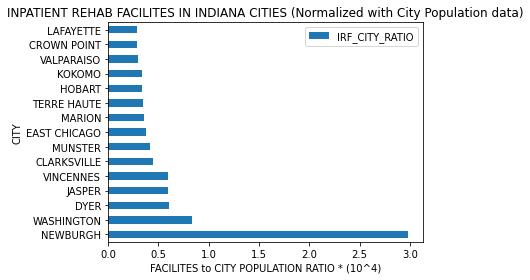

In [35]:
#IRF Facilites In Indiana State normalized to population

newirf3 = newirf2.sort_values(by = 'IRF_CITY_RATIO', ascending=False)
newirf3 = newirf3.head(15)
newirf4 = pd.DataFrame().assign(CITY=newirf3['index'], NO_OF_FACILITIES=newirf3['PRVDR_CITY'], IRF_CITY_RATIO=newirf3['IRF_CITY_RATIO'], POPEST2020=newirf3['POPEST2020'])
print(newirf4.head())

newirf4.plot.barh('CITY','IRF_CITY_RATIO')
plt.ylabel('CITY')
plt.xlabel('FACILITES to CITY POPULATION RATIO * (10^4)')
plt.yticks(fontsize = 10)
plt.title('INPATIENT REHAB FACILITES IN INDIANA CITIES (Normalized with City Population data)')
plt.tight_layout()
plt.show()

In [ ]:
### Conclusion:

In [36]:
ltc_ct=dfltc[dfltc['STATE']== 'IN']
ltc_ct.head()
ltc_ct2 = ltc_ct['PRVDR_CITY'].value_counts().reset_index(name='PRVDR_CITY').sort_values(['PRVDR_CITY'], ascending=False)
ltc_ct2.insert(loc=1, column="CITY_NAME", value=ltc_ct2['index'].str.lower())
ltc_ct2.head()

newltc2 = pd.merge(ltc_ct2, dfctpopin3, how='left', left_on=['CITY_NAME'], right_on = ['CITY2'])
newltc2.insert(loc=4, column="LTC_CITY_RATIO", value=((newltc2['PRVDR_CITY']/newltc2['POPEST2020'])*10000))
newltc2 = newltc2[newltc2.CITY_NAME != 'state total']
newltc2.head()

index     CITY_NAME  PRVDR_CITY          CITY  LTC_CITY_RATIO  \
0  INDIANAPOLIS  indianapolis           3  Indianapolis        0.033454   
2       HAMMOND       hammond           1       Hammond        0.128854   
3    EVANSVILLE    evansville           1    Evansville        0.085282   
4  EAST CHICAGO  east chicago           1  East Chicago        0.380836   
5        MUNCIE        muncie           1        Muncie        0.153278   

          CITY2  POPEST2020  
0  indianapolis    896749.0  
2       hammond     77607.0  
3    evansville    117258.0  
4  east chicago     26258.0  
5        muncie     65241.0

           CITY  NO_OF_FACILITIES  LTC_CITY_RATIO  POPEST2020
4  EAST CHICAGO                 1        0.380836     26258.0
6   CROWN POINT                 1        0.289763     34511.0
5        MUNCIE                 1        0.153278     65241.0
2       HAMMOND                 1        0.128854     77607.0
3    EVANSVILLE                 1        0.085282    117258.0


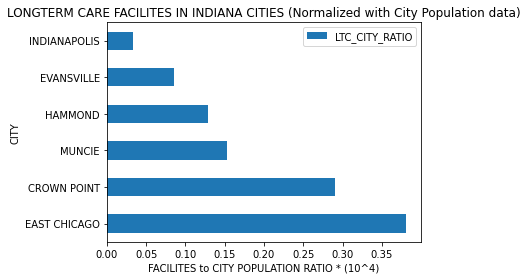

In [37]:
# Longterm Care Facilites In Indiana State normalized to population

newltc3 = newltc2.sort_values(by = 'LTC_CITY_RATIO', ascending=False)
newltc3 = newltc3.head(15)
newltc4 = pd.DataFrame().assign(CITY=newltc3['index'], NO_OF_FACILITIES=newltc3['PRVDR_CITY'], LTC_CITY_RATIO=newltc3['LTC_CITY_RATIO'], POPEST2020=newltc3['POPEST2020'])
print(newltc4.head())

newltc4.plot.barh('CITY','LTC_CITY_RATIO')
plt.ylabel('CITY')
plt.xlabel('FACILITES to CITY POPULATION RATIO * (10^4)')
plt.yticks(fontsize = 10)
plt.title('LONGTERM CARE FACILITES IN INDIANA CITIES (Normalized with City Population data)')
plt.tight_layout()
plt.show()

In [ ]:
### Conclusion:

### Q2. TOP INDICATIONS BASED ON PATIENT COUNTS FOR INPATIENT AND OUTPATIENT SERVICES

In [38]:
ihp_pt = pd.read_csv("IHP_TOPDISCH_DISEASE_20181920.csv")
ihp_pt = pd.DataFrame(ihp_pt)
ihp_pt

DRG_CD                                           DRG_DESC  TOT_DSCH_18  \
0     177       RESPIRATORY INFECTIONS & INFLAMMATIONS W MCC        73413   
1     189              PULMONARY EDEMA & RESPIRATORY FAILURE       147918   
2     193                  SIMPLE PNEUMONIA & PLEURISY W MCC       164685   
3     291                        HEART FAILURE & SHOCK W MCC       381898   
4     378                               G.I. HEMORRHAGE W CC       128431   
5     392  ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS...       141917   
6     470  MAJOR HIP AND KNEE JOINT REPLACEMENT OR REATTA...       463050   
7     690          KIDNEY & URINARY TRACT INFECTIONS W/O MCC       128310   
8     871  SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W...       625930   
9     872  SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W...       159380   

   TOT_DSCH_19  TOT_DSCH_20  
0        72024       179339  
1       142779       106791  
2       147397       128737  
3       393492       329977  
4       122839       103754  
5       133569       102085  
6       420838       268571  
7       126130        95036  
8       607114       586558  
9       153356       125785

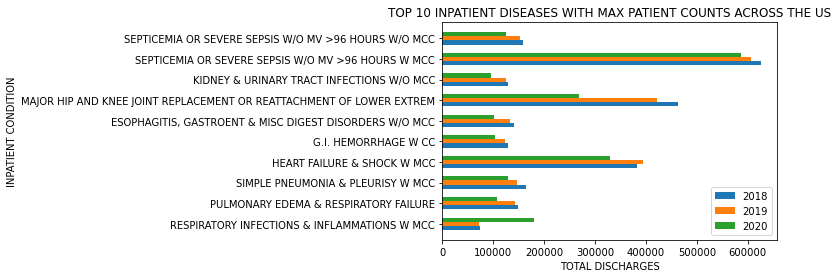

In [39]:
X = ihp_pt['DRG_DESC']
y = ihp_pt['TOT_DSCH_18']
z = ihp_pt['TOT_DSCH_19']
a = ihp_pt['TOT_DSCH_20']
  
Y_axis = np.arange(len(X))
  
plt.barh(Y_axis - 0.2, y, 0.2, label = '2018',align='center')
plt.barh(Y_axis, z, 0.2, label = '2019',align='center')
plt.barh(Y_axis + 0.2, a, 0.2, label = '2020',align='center')

plt.yticks(Y_axis, X)
plt.ylabel("INPATIENT CONDITION")
plt.xlabel("TOTAL DISCHARGES")
plt.title("TOP 10 INPATIENT DISEASES WITH MAX PATIENT COUNTS ACROSS THE US")
plt.legend()
plt.show()

In [40]:
ihp_ptb = pd.read_csv("IHP_TOPDISCH_STATE_20181920.csv")
ihp_ptb = pd.DataFrame(ihp_ptb)
ihp_ptb

Prv_State  TOT_DSCH_18  TOT_DSCH_19  TOT_DSCH_20
0        CA       536190       526766       448288
1        FL       566195       548276       476488
2        IL       324291       316887       265867
3        MA       225035       222575       193702
4        MI       269411       254397       200360
5        NC       257082       249423       207296
6        NY       428538       426884       357657
7        OH       277340       262206       216316
8        PA       316478       307961       256569
9        TX       491290       472628       400557

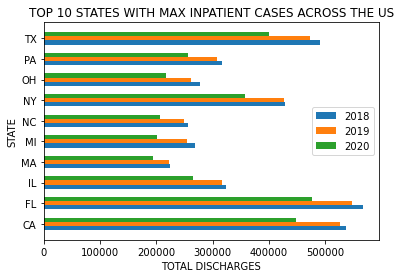

In [41]:
X = ihp_ptb['Prv_State']
y = ihp_ptb['TOT_DSCH_18']
z = ihp_ptb['TOT_DSCH_19']
a = ihp_ptb['TOT_DSCH_20']
  
Y_axis = np.arange(len(X))
  
plt.barh(Y_axis - 0.2, y, 0.2, label = '2018',align='center')
plt.barh(Y_axis, z, 0.2, label = '2019',align='center')
plt.barh(Y_axis + 0.2, a, 0.2, label = '2020',align='center')


plt.yticks(Y_axis, X)
plt.ylabel("STATE")
plt.xlabel("TOTAL DISCHARGES")
plt.title("TOP 10 STATES WITH MAX INPATIENT CASES ACROSS THE US")
plt.legend()
plt.show()

In [42]:
opd_pt = pd.read_csv("OPD_TOPDISCH_DISEASE_20181920.csv")
opd_pt = pd.DataFrame(opd_pt)
opd_pt = opd_pt[opd_pt.APC_Cd != 8011]
opd_pt

APC_Cd                                         APC_Desc  TOT_DSCH_18  \
0    5072  Level 2 Excision/ Biopsy/ Incision and Drainage       407260   
1    5114               Level 4 Musculoskeletal Procedures       215778   
2    5115               Level 5 Musculoskeletal Procedures       110308   
3    5191                  Level 1 Endovascular Procedures       345852   
4    5193                  Level 3 Endovascular Procedures       185780   
5    5302                      Level 2 Upper GI Procedures       191636   
6    5361         Level 1 Laparoscopy and Related Services       183598   
7    5373             Level 3 Urology and Related Services       148728   
8    5491                   Level 1 Intraocular Procedures       301074   

   TOT_DSCH_19  TOT_DSCH_20  
0       414186       303525  
1       210238       181656  
2       138447       221411  
3       348311       269497  
4       164919       136172  
5       195551       161761  
6       184621       154995  
7       158195       129782  
8       279931       198974

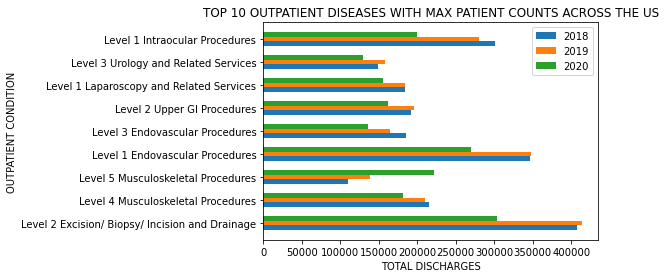

In [43]:
X = opd_pt['APC_Desc']
y = opd_pt['TOT_DSCH_18']
z = opd_pt['TOT_DSCH_19']
a = opd_pt['TOT_DSCH_20']
  
Y_axis = np.arange(len(X))
  
plt.barh(Y_axis - 0.2, y, 0.2, label = '2018',align='center')
plt.barh(Y_axis, z, 0.2, label = '2019',align='center')
plt.barh(Y_axis + 0.2, a, 0.2, label = '2020',align='center')

plt.yticks(Y_axis, X)
plt.ylabel("OUTPATIENT CONDITION")
plt.xlabel("TOTAL DISCHARGES")
plt.title("TOP 10 OUTPATIENT DISEASES WITH MAX PATIENT COUNTS ACROSS THE US")
plt.legend()
plt.show()

In [44]:
opd_ptb = pd.read_csv("OPD_TOPDISCH_STATE_20181920.csv")
opd_ptb = pd.DataFrame(opd_ptb)
opd_ptb

Prv_State  TOT_DSCH_18  TOT_DSCH_19  TOT_DSCH_20
0        CA       341822       369191       319892
1        FL       340871       362846       308157
2        IL       239651       250501       201929
3        MI       188026       197060       146141
4        NC       200742       212456       177677
5        NY       246461       263893       209620
6        OH       224049       235297       196517
7        PA       223045       237845       196270
8        TX       357465       382394       314420
9        VA       151077       160696       136231

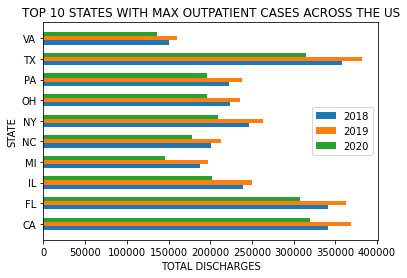

In [45]:
X = opd_ptb['Prv_State']
y = opd_ptb['TOT_DSCH_18']
z = opd_ptb['TOT_DSCH_19']
a = opd_ptb['TOT_DSCH_20']
  
Y_axis = np.arange(len(X))
  
plt.barh(Y_axis - 0.2, y, 0.2, label = '2018',align='center')
plt.barh(Y_axis, z, 0.2, label = '2019',align='center')
plt.barh(Y_axis + 0.2, a, 0.2, label = '2020',align='center')


plt.yticks(Y_axis, X)
plt.ylabel("STATE")
plt.xlabel("TOTAL DISCHARGES")
plt.title("TOP 10 STATES WITH MAX OUTPATIENT CASES ACROSS THE US")
plt.legend()
plt.show()

### Q3. Most Expensive Inpatient and Outpatient Conditions by Cost

In [46]:
ihpxp1 = pd.DataFrame().assign(DRG_Cd=dfihp['DRG_Cd'],DRG_Desc=dfihp['DRG_Desc'], MDR_AMT=dfihp['Avg_Mdcr_Pyt_Amt'])
ihpxp_avg = ihpxp1.groupby(['DRG_Cd', 'DRG_Desc']).mean().reset_index()
ihpxp_max = ihpxp1.groupby(['DRG_Cd', 'DRG_Desc']).max().reset_index() 
ihpxp_min = ihpxp1.groupby(['DRG_Cd', 'DRG_Desc']).min().reset_index() 
ihpxp2 = pd.merge(ihpxp_avg, ihpxp_max, how='left', left_on=['DRG_Cd'], right_on = ['DRG_Cd'])
ihpxp3 = pd.merge(ihpxp2, ihpxp_min, how='left', left_on=['DRG_Cd'], right_on = ['DRG_Cd'])
ihpxp4 = pd.DataFrame().assign(DRG_Cd=ihpxp3['DRG_Cd'],DRG_Desc=ihpxp3['DRG_Desc_x'],AVG_COST=ihpxp3['MDR_AMT_x'],MAX_COST=ihpxp3['MDR_AMT_y'],MIN_COST=ihpxp3['MDR_AMT'])
ihpxp5 = ihpxp4.sort_values(by = 'MAX_COST', ascending=False)
ihpxp5 = ihpxp5.head(10)
ihpxp5

DRG_Cd                                           DRG_Desc       AVG_COST  \
445     813                              COAGULATION DISORDERS   14628.979239   
0         1  HEART TRANSPLANT OR IMPLANT OF HEART ASSIST SY...  255544.726148   
1         3  "ECMO OR TRACHEOSTOMY WITH MV >96 HOURS OR PRI...  152122.672154   
510     927  EXTENSIVE BURNS OR FULL THICKNESS BURNS WITH M...  349798.000000   
227     356    OTHER DIGESTIVE SYSTEM O.R. PROCEDURES WITH MCC   33211.872070   
3         5  LIVER TRANSPLANT WITH MCC OR INTESTINAL TRANSP...  102392.048480   
2         4  TRACH W MV >96 HRS OR PDX EXC FACE, MOUTH & NE...   91504.487837   
11       16  AUTOLOGOUS BONE MARROW TRANSPLANT W CC/MCC OR ...   94412.975591   
289     469  MAJOR HIP AND KNEE JOINT REPLACEMENT OR REATTA...   21199.387356   
5         7                                    LUNG TRANSPLANT  120612.778390   

        MAX_COST       MIN_COST  
445  514643.5000    7370.866667  
0    472611.5000  137219.941200  
1    434265.0313   61340.727270  
510  349798.0000  349798.000000  
227  322033.3044   18389.727270  
3    287812.8000   61194.052630  
2    273659.3889   36743.636360  
11   267470.0909   35118.333330  
289  251497.9600   10539.916670  
5    217216.8824   69232.642860

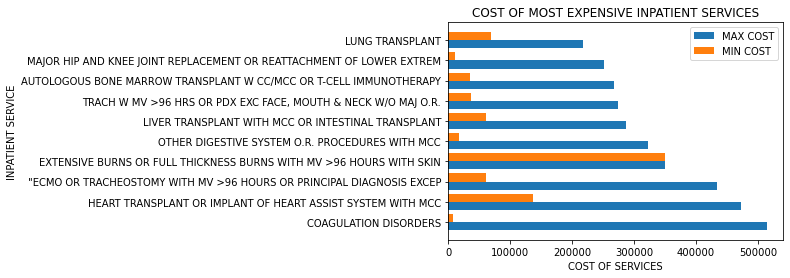

In [47]:
# Most expensive Inpatient Services
X = ihpxp5 ['DRG_Desc']
y = ihpxp5 ['MAX_COST']
z = ihpxp5 ['MIN_COST']
  
y_axis = np.arange(len(X))
  
plt.barh(y_axis - 0.2, y, 0.4, label = 'MAX COST')
plt.barh(y_axis + 0.2, z, 0.4, label = 'MIN COST')

plt.yticks(y_axis, X)
plt.ylabel("INPATIENT SERVICE")
plt.xlabel("COST OF SERVICES")
plt.title("COST OF MOST EXPENSIVE INPATIENT SERVICES")
plt.legend()
plt.show()

In [48]:
ihpxp6 = pd.DataFrame().assign(DRG_Cd=dfihp['DRG_Cd'],DRG_Desc=dfihp['DRG_Desc'], PT_CT=dfihp['Tot_Dschrgs'])
ihpxp_pt = ihpxp6.groupby(['DRG_Cd', 'DRG_Desc']).sum()
ihpxp7 = pd.merge(ihpxp4, ihpxp_pt, how='left', left_on=['DRG_Cd'], right_on = ['DRG_Cd'])
ihpxp8 = pd.DataFrame().assign(DRG_Cd=ihpxp7['DRG_Cd'],DRG_Desc=ihpxp7['DRG_Desc'],AVG_COST=ihpxp7['AVG_COST'],MAX_COST=ihpxp7['MAX_COST'],MIN_COST=ihpxp7['MIN_COST'],PT_CT=ihpxp7['PT_CT'])
ihpxp8 = ihpxp8.sort_values(by = 'PT_CT', ascending=False)
ihpxp9 = ihpxp8.head(10)
ihpxp9

DRG_Cd                                           DRG_Desc      AVG_COST  \
482     871  SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W...  13207.017921   
185     291                   HEART FAILURE AND SHOCK WITH MCC   9464.774300   
290     470  MAJOR HIP AND KNEE JOINT REPLACEMENT OR REATTA...  12642.580565   
104     177  RESPIRATORY INFECTIONS AND INFLAMMATIONS WITH MCC  14262.636187   
118     193             SIMPLE PNEUMONIA AND PLEURISY WITH MCC   9031.074865   
483     872  SEPTICEMIA OR SEVERE SEPSIS WITHOUT MV >96 HOU...   7010.971199   
114     189            PULMONARY EDEMA AND RESPIRATORY FAILURE   8717.984068   
238     378                               G.I. HEMORRHAGE W CC   6618.578187   
250     392  ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS...   5044.127385   
412     690          KIDNEY & URINARY TRACT INFECTIONS W/O MCC   5311.695213   

         MAX_COST     MIN_COST   PT_CT  
482  128523.50000  7047.375000  586558  
185  124468.50000  4961.505747  329977  
290   58973.73333  5747.428571  268571  
104  126805.30000  6765.894737  179339  
118   45044.33333  4266.873418  128737  
483  121897.31250  2778.571429  125785  
114  128772.18180  4685.357143  106791  
238   42308.30769  2318.608696  103754  
250   40759.18182  2053.000000  102085  
412   44546.75000  2670.933333   95036

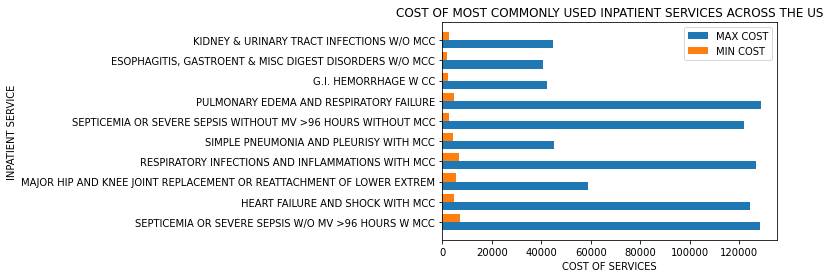

In [49]:
# Difference in Cost of Most Frequently used Inpatient Services in the US

X = ihpxp9 ['DRG_Desc']
y = ihpxp9 ['MAX_COST']
z = ihpxp9 ['MIN_COST']
  
y_axis = np.arange(len(X))
  
plt.barh(y_axis - 0.2, y, 0.4, label = 'MAX COST')
plt.barh(y_axis + 0.2, z, 0.4, label = 'MIN COST')

plt.yticks(y_axis, X)
plt.ylabel("INPATIENT SERVICE")
plt.xlabel("COST OF SERVICES")
plt.title("COST OF MOST COMMONLY USED INPATIENT SERVICES ACROSS THE US")
plt.legend()
plt.show()
             

In [50]:
dfihp_ct=dfihp[dfihp['Prv_State']== 'IN']
dfihp_ct.head()
ihpxpa = pd.DataFrame().assign(DRG_Cd=dfihp_ct['DRG_Cd'],DRG_Desc=dfihp_ct['DRG_Desc'], MDR_AMT=dfihp_ct['Avg_Mdcr_Pyt_Amt'])
ihpxp_avga = ihpxpa.groupby(['DRG_Cd', 'DRG_Desc']).mean().reset_index()
ihpxp_maxa = ihpxpa.groupby(['DRG_Cd', 'DRG_Desc']).max().reset_index() 
ihpxp_mina = ihpxpa.groupby(['DRG_Cd', 'DRG_Desc']).min().reset_index() 
ihpxpb = pd.merge(ihpxp_avga, ihpxp_maxa, how='left', left_on=['DRG_Cd'], right_on = ['DRG_Cd'])
ihpxpc = pd.merge(ihpxpb, ihpxp_mina, how='left', left_on=['DRG_Cd'], right_on = ['DRG_Cd'])
ihpxpd = pd.DataFrame().assign(DRG_Cd=ihpxpc['DRG_Cd'],DRG_Desc=ihpxpc['DRG_Desc_x'],AVG_COST=ihpxpc['MDR_AMT_x'],MAX_COST=ihpxpc['MDR_AMT_y'],MIN_COST=ihpxpc['MDR_AMT'])

ihpxpf = pd.DataFrame().assign(DRG_Cd=dfihp_ct['DRG_Cd'],DRG_Desc=dfihp_ct['DRG_Desc'], PT_CT=dfihp_ct['Tot_Dschrgs'])
ihpxp_pta = ihpxpf.groupby(['DRG_Cd', 'DRG_Desc']).sum()
ihpxpg = pd.merge(ihpxpd, ihpxp_pta, how='left', left_on=['DRG_Cd'], right_on = ['DRG_Cd'])
ihpxph = pd.DataFrame().assign(DRG_Cd=ihpxpg['DRG_Cd'],DRG_Desc=ihpxpg['DRG_Desc'],AVG_COST=ihpxpg['AVG_COST'],MAX_COST=ihpxpg['MAX_COST'],MIN_COST=ihpxpg['MIN_COST'],PT_CT=ihpxpg['PT_CT'])
ihpxph = ihpxph.sort_values(by = 'PT_CT', ascending=False)
ihpxpi = ihpxph.head(10)
ihpxpi

DRG_Cd                                           DRG_Desc      AVG_COST  \
289     871  SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W...  11798.090810   
119     291                   HEART FAILURE AND SHOCK WITH MCC   8518.293726   
198     470  MAJOR HIP AND KNEE JOINT REPLACEMENT OR REATTA...  11820.155247   
68      193             SIMPLE PNEUMONIA AND PLEURISY WITH MCC   8379.005069   
59      177  RESPIRATORY INFECTIONS AND INFLAMMATIONS WITH MCC  12892.155292   
64      189            PULMONARY EDEMA AND RESPIRATORY FAILURE   7811.008278   
290     872  SEPTICEMIA OR SEVERE SEPSIS WITHOUT MV >96 HOU...   6301.135491   
153     378                               G.I. HEMORRHAGE W CC   6116.092537   
256     683                                 RENAL FAILURE W CC   5569.016809   
65      190        CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC   7183.107061   

        MAX_COST     MIN_COST  PT_CT  
289  21061.62500  9556.230769  12696  
119  16925.02740  6424.650000   8889  
198  20794.39286  8410.472973   7195  
68   16671.55556  6398.086957   4106  
59   22538.55738  9974.367347   3872  
64   15831.57658  6302.724138   2928  
290  13684.57576  5035.426667   2745  
153  13402.48485  4954.940000   2735  
256  13085.14894  4026.045455   2655  
65   14586.82143  5304.338235   2630

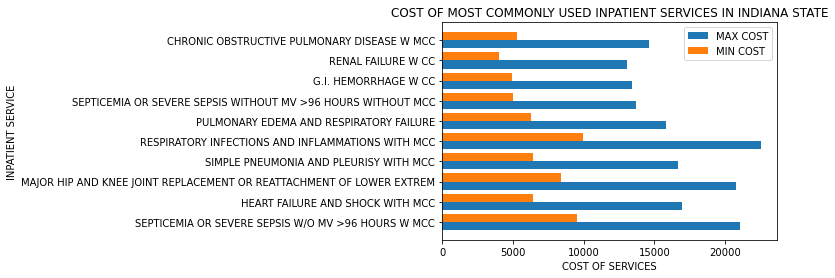

In [51]:
# Difference in Cost of Most Frequently used Inpatient Services in Indiana State

X = ihpxpi ['DRG_Desc']
y = ihpxpi ['MAX_COST']
z = ihpxpi ['MIN_COST']
  
y_axis = np.arange(len(X))
  
plt.barh(y_axis - 0.2, y, 0.4, label = 'MAX COST')
plt.barh(y_axis + 0.2, z, 0.4, label = 'MIN COST')

plt.yticks(y_axis, X)
plt.ylabel("INPATIENT SERVICE")
plt.xlabel("COST OF SERVICES")
plt.title("COST OF MOST COMMONLY USED INPATIENT SERVICES IN INDIANA STATE")
plt.legend()
plt.show()

In [52]:
opdxp1 = pd.DataFrame().assign(APC_Cd=dfopd['APC_Cd'],APC_Desc=dfopd['APC_Desc'], MDR_AMT=dfopd['Avg_Mdcr_Pymt_Amt'])
opdxp_avg = opdxp1.groupby(['APC_Cd', 'APC_Desc']).mean().reset_index()
opdxp_max = opdxp1.groupby(['APC_Cd', 'APC_Desc']).max().reset_index() 
opdxp_min = opdxp1.groupby(['APC_Cd', 'APC_Desc']).min().reset_index() 
opdxp2 = pd.merge(opdxp_avg, opdxp_max, how='left', left_on=['APC_Cd'], right_on = ['APC_Cd'])
opdxp3 = pd.merge(opdxp2, opdxp_min, how='left', left_on=['APC_Cd'], right_on = ['APC_Cd'])
opdxp4 = pd.DataFrame().assign(APC_Cd=opdxp3['APC_Cd'],APC_Desc=opdxp3['APC_Desc_x'],AVG_COST=opdxp3['MDR_AMT_x'],MAX_COST=opdxp3['MDR_AMT_y'],MIN_COST=opdxp3['MDR_AMT'])
opdxp5 = opdxp4.sort_values(by = 'MAX_COST', ascending=False)
opdxp5 = opdxp5.head(10)
opdxp5

APC_Cd                                           APC_Desc      AVG_COST  \
34    5244  Level 4 Blood Product Exchange and Related Ser...  43148.735330   
33    5232                 Level 2 ICD and Similar Procedures  30404.307744   
17    5166                         Cochlear Implant Procedure  31393.967717   
55    5464     Level 4 Neurostimulator and Related Procedures  26744.634306   
25    5200          Implantation Wireless PA Pressure Monitor  27200.471956   
32    5231                 Level 1 ICD and Similar Procedures  20564.778809   
28    5213              Level 3 Electrophysiologic Procedures  18873.478655   
54    5463     Level 3 Neurostimulator and Related Procedures  17229.573373   
31    5224           Level 4 Pacemaker and Similar Procedures  16621.240271   
46    5377               Level 7 Urology and Related Services  15967.268109   

       MAX_COST      MIN_COST  
34  53797.48111  37281.325380  
33  47202.43714  10629.669570  
17  47138.92533  22172.113460  
55  41360.32909  14485.755290  
25  33072.17222  23396.994620  
32  31116.52333  15584.710000  
28  29190.57909  10957.967580  
54  27005.59500   1481.284167  
31  26055.52400   7801.705333  
46  24427.88520  10646.997330

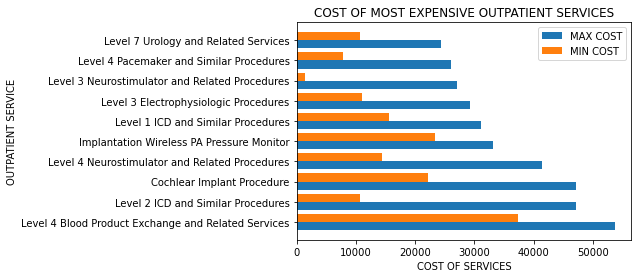

In [53]:
# Most expensive Outpatient Services


X = opdxp5 ['APC_Desc']
y = opdxp5 ['MAX_COST']
z = opdxp5 ['MIN_COST']
  
y_axis = np.arange(len(X))
  
plt.barh(y_axis - 0.2, y, 0.4, label = 'MAX COST')
plt.barh(y_axis + 0.2, z, 0.4, label = 'MIN COST')

plt.yticks(y_axis, X)
plt.ylabel("OUTPATIENT SERVICE")
plt.xlabel("COST OF SERVICES")
plt.title("COST OF MOST EXPENSIVE OUTPATIENT SERVICES")
plt.legend()
plt.show()
                          

In [54]:
opdxp6 = pd.DataFrame().assign(APC_Cd=dfopd['APC_Cd'],APC_Desc=dfopd['APC_Desc'], PT_CT=dfopd['Bene_Cnt'])
opdxp_pt = opdxp6.groupby(['APC_Cd', 'APC_Desc']).sum()
opdxp7 = pd.merge(opdxp4, opdxp_pt, how='left', left_on=['APC_Cd'], right_on = ['APC_Cd'])
opdxp8 = pd.DataFrame().assign(APC_Cd=opdxp7['APC_Cd'],APC_Desc=opdxp7['APC_Desc'],AVG_COST=opdxp7['AVG_COST'],MAX_COST=opdxp7['MAX_COST'],MIN_COST=opdxp7['MIN_COST'],PT_CT=opdxp7['PT_CT'])
opdxp8 = opdxp8.sort_values(by = 'PT_CT', ascending=False)
opdxp9 = opdxp8.head(10)
opdxp9

APC_Cd                                         APC_Desc      AVG_COST  \
66    8011               Comprehensive Observation Services   1806.915184   
0     5072  Level 2 Excision/ Biopsy/ Incision and Drainage   1075.794201   
21    5191                  Level 1 Endovascular Procedures   1949.903685   
9     5115               Level 5 Musculoskeletal Procedures  10275.122654   
57    5491                   Level 1 Intraocular Procedures   1588.503748   
8     5114               Level 4 Musculoskeletal Procedures   4681.265674   
19    5183                      Level 3 Vascular Procedures   2177.683995   
35    5302                      Level 2 Upper GI Procedures   1221.797337   
40    5361         Level 1 Laparoscopy and Related Services   3772.358175   
23    5193                  Level 3 Endovascular Procedures   8404.217141   

        MAX_COST     MIN_COST     PT_CT  
66   3065.105484    59.127656  920002.0  
0    1657.125652   437.400057  303525.0  
21   2984.783636  1027.568203  269497.0  
9   16591.365930  4185.451681  221411.0  
57   2415.983542   276.484743  198974.0  
8    7617.305158  1140.570976  181656.0  
19   3329.801774   930.452903  178415.0  
35   1875.001667   460.726500  161761.0  
40   5875.210000  1315.432812  154995.0  
23  13503.262860  3341.570994  136172.0

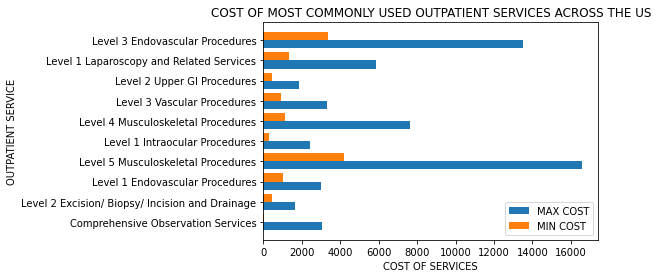

In [55]:
# Difference in Cost of Most Frequently used Outpatient Services in the US

X = opdxp9 ['APC_Desc']
y = opdxp9 ['MAX_COST']
z = opdxp9 ['MIN_COST']
  
y_axis = np.arange(len(X))
  
plt.barh(y_axis - 0.2, y, 0.4, label = 'MAX COST')
plt.barh(y_axis + 0.2, z, 0.4, label = 'MIN COST')

plt.yticks(y_axis, X)
plt.ylabel("OUTPATIENT SERVICE")
plt.xlabel("COST OF SERVICES")
plt.title("COST OF MOST COMMONLY USED OUTPATIENT SERVICES ACROSS THE US")
plt.legend()
plt.show()



In [56]:
dfopd_ct=dfopd[dfopd['Prv_State']== 'IN']
dfopd_ct.head()
opdxpa = pd.DataFrame().assign(APC_Cd=dfopd_ct['APC_Cd'],APC_Desc=dfopd_ct['APC_Desc'], MDR_AMT=dfopd_ct['Avg_Mdcr_Pymt_Amt'])
opdxp_avga = opdxpa.groupby(['APC_Cd', 'APC_Desc']).mean().reset_index()
opdxp_maxa = opdxpa.groupby(['APC_Cd', 'APC_Desc']).max().reset_index() 
opdxp_mina = opdxpa.groupby(['APC_Cd', 'APC_Desc']).min().reset_index() 
opdxpb = pd.merge(opdxp_avga, opdxp_maxa, how='left', left_on=['APC_Cd'], right_on = ['APC_Cd'])
opdxpc = pd.merge(opdxpb, opdxp_mina, how='left', left_on=['APC_Cd'], right_on = ['APC_Cd'])
opdxpd = pd.DataFrame().assign(APC_Cd=opdxpc['APC_Cd'],APC_Desc=opdxpc['APC_Desc_x'],AVG_COST=opdxpc['MDR_AMT_x'],MAX_COST=opdxpc['MDR_AMT_y'],MIN_COST=opdxpc['MDR_AMT'])

opdxpf = pd.DataFrame().assign(APC_Cd=dfopd_ct['APC_Cd'],APC_Desc=dfopd_ct['APC_Desc'], PT_CT=dfopd_ct['Bene_Cnt'])
opdxp_pta = opdxpf.groupby(['APC_Cd', 'APC_Desc']).sum()
opdxpg = pd.merge(opdxpd, opdxp_pta, how='left', left_on=['APC_Cd'], right_on = ['APC_Cd'])
opdxph = pd.DataFrame().assign(APC_Cd=opdxpg['APC_Cd'],APC_Desc=opdxpg['APC_Desc'],AVG_COST=opdxpg['AVG_COST'],MAX_COST=opdxpg['MAX_COST'],MIN_COST=opdxpg['MIN_COST'],PT_CT=opdxpg['PT_CT'])
opdxph = opdxph.sort_values(by = 'PT_CT', ascending=False)
opdxpi = opdxph.head(10)
opdxpi


APC_Cd                                         APC_Desc     AVG_COST  \
62    8011               Comprehensive Observation Services  1759.908803   
0     5072  Level 2 Excision/ Biopsy/ Incision and Drainage  1054.050580   
21    5191                  Level 1 Endovascular Procedures  1916.138706   
9     5115               Level 5 Musculoskeletal Procedures  9977.652221   
19    5183                      Level 3 Vascular Procedures  2128.622057   
8     5114               Level 4 Musculoskeletal Procedures  4563.191911   
56    5491                   Level 1 Intraocular Procedures  1500.677537   
34    5302                      Level 2 Upper GI Procedures  1185.830777   
23    5193                  Level 3 Endovascular Procedures  8214.670330   
42    5374             Level 4 Urology and Related Services  2335.608816   

        MAX_COST     MIN_COST    PT_CT  
62   1965.492289  1561.679262  23407.0  
0    1148.495534   961.232727   8333.0  
21   2097.898529  1773.452238   7560.0  
9   11209.376670  8965.336667   5792.0  
19   2347.227391  1881.735556   5410.0  
8    4971.157576  4199.214865   5060.0  
56   1629.199950   276.484743   4968.0  
34   1307.816400   980.915909   4770.0  
23   8591.747500  7528.752414   3908.0  
42   2445.150435  2161.593448   3500.0

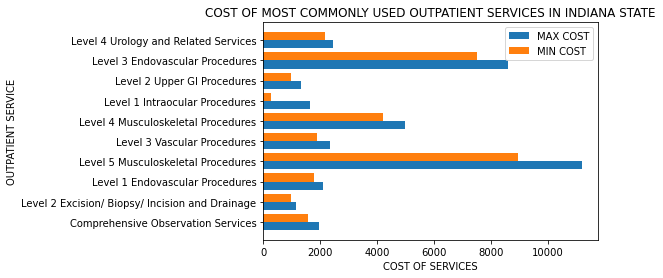

In [57]:
# Difference in Cost of Most Frequently used Outpatient Services in Indiana State

X = opdxpi ['APC_Desc']
y = opdxpi ['MAX_COST']
z = opdxpi ['MIN_COST']
  
y_axis = np.arange(len(X))
  
plt.barh(y_axis - 0.2, y, 0.4, label = 'MAX COST')
plt.barh(y_axis + 0.2, z, 0.4, label = 'MIN COST')

plt.yticks(y_axis, X)
plt.ylabel("OUTPATIENT SERVICE")
plt.xlabel("COST OF SERVICES")
plt.title("COST OF MOST COMMONLY USED OUTPATIENT SERVICES IN INDIANA STATE")
plt.legend()
plt.show()

### Q4.Average HCC scores across States and Indiana Cities

In [58]:
snfxp1 = pd.DataFrame().assign(STATE=dfsnf['STATE'], HCC_SCORE=dfsnf['BENE_AVG_RISK_SCRE'])
snfxp_avg = snfxp1.groupby(['STATE']).mean().reset_index()
snfxp_max = snfxp1.groupby(['STATE']).max().reset_index() 
snfxp_min = snfxp1.groupby(['STATE']).min().reset_index() 
snfxp2 = pd.merge(snfxp_avg, snfxp_max, how='left', left_on=['STATE'], right_on = ['STATE'])
snfxp3 = pd.merge(snfxp2, snfxp_min, how='left', left_on=['STATE'], right_on = ['STATE'])
snfxp4 = pd.DataFrame().assign(STATE=snfxp3['STATE'],AVG_SCORE=snfxp3['HCC_SCORE_x'], MAX_SCORE=snfxp3['HCC_SCORE_y'],MIN_SCORE=snfxp3['HCC_SCORE'])
snfxp5 = snfxp4.sort_values(by = 'AVG_SCORE', ascending=False)
snfxp5 = snfxp5[snfxp5.STATE != 'NATIONAL TOTAL']
snfxp6 = snfxp5[snfxp5.MIN_SCORE != 0.0]
snfxp6 = snfxp6.head(10)
snfxp6

STATE  AVG_SCORE  MAX_SCORE  MIN_SCORE
34    NV   3.174909       4.69       1.97
3     AZ   2.898485       6.65       1.71
17    KY   2.782286       5.69       1.65
1     AL   2.702246       4.86       1.61
0     AK   2.578000       4.31       1.59
21    ME   2.563529       3.56       1.72
11    HI   2.558065       5.23       1.15
13    ID   2.537368       3.59       1.53
48    VT   2.323333       2.94       1.23
26    MT   2.313878       3.28       1.69

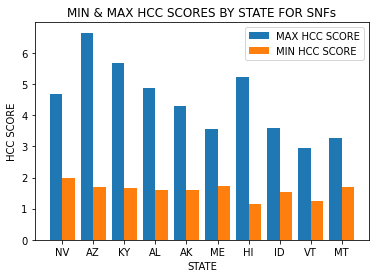

In [59]:
X = snfxp6['STATE']
y = snfxp6['MAX_SCORE']
z = snfxp6['MIN_SCORE']
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, y, 0.4, label = 'MAX HCC SCORE')
plt.bar(X_axis + 0.2, z, 0.4, label = 'MIN HCC SCORE')

plt.xticks(X_axis, X)
plt.xlabel("STATE")
plt.ylabel("HCC SCORE")
plt.title("MIN & MAX HCC SCORES BY STATE FOR SNFs")
plt.legend()
plt.show()

In [60]:
trace1 = go.Bar(
    x=snfxp5.STATE,
    y=snfxp5.MAX_SCORE,
    name='Max HCC Score',
    marker=dict(color='rgb(158,202,225)'),
)
trace2 = go.Bar(
    x=snfxp5.STATE,
    y=snfxp5.MIN_SCORE,
    name='Min HCC Score',
    marker=dict(color='rgb(58,22,25)'),
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group',
    title='Minimum and Maximum HCC scores for SNF facilities in different States',
    legend=dict(orientation="h")
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='grouped-bar')

In [61]:
hosxp1 = pd.DataFrame().assign(STATE=dfhos['STATE'], HCC_SCORE=dfhos['BENE_AVG_RISK_SCRE'])
hosxp_avg = hosxp1.groupby(['STATE']).mean().reset_index()
hosxp_max = hosxp1.groupby(['STATE']).max().reset_index() 
hosxp_min = hosxp1.groupby(['STATE']).min().reset_index() 
hosxp2 = pd.merge(hosxp_avg, hosxp_max, how='left', left_on=['STATE'], right_on = ['STATE'])
hosxp3 = pd.merge(hosxp2, hosxp_min, how='left', left_on=['STATE'], right_on = ['STATE'])
hosxp4 = pd.DataFrame().assign(STATE=hosxp3['STATE'],AVG_SCORE=hosxp3['HCC_SCORE_x'], MAX_SCORE=hosxp3['HCC_SCORE_y'],MIN_SCORE=hosxp3['HCC_SCORE'])
hosxp5 = hosxp4.sort_values(by = 'AVG_SCORE', ascending=False)
hosxp5 = hosxp5[hosxp5.STATE != 'NATIONAL TOTAL']
hosxp6 = hosxp5[hosxp5.MIN_SCORE != 0.0]
hosxp6 = hosxp6.head(10)
hosxp6


STATE  AVG_SCORE  MAX_SCORE  MIN_SCORE
40    PR   3.066444       3.51       2.14
9     FL   2.830213       3.47       2.04
35    NY   2.765814       3.20       2.30
32    NJ   2.622321       3.10       1.95
7     DC   2.608000       2.98       2.24
51    WV   2.603684       3.01       2.04
17    KY   2.601667       2.94       2.24
34    NV   2.598947       3.62       1.94
6     CT   2.582333       3.21       1.88
28    NC   2.577595       3.16       2.15

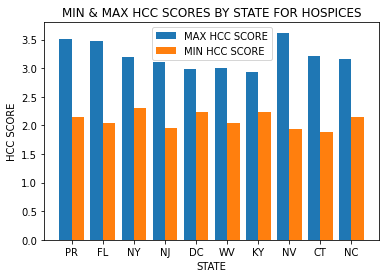

In [62]:
X = hosxp6['STATE']
y = hosxp6['MAX_SCORE']
z = hosxp6['MIN_SCORE']
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, y, 0.4, label = 'MAX HCC SCORE')
plt.bar(X_axis + 0.2, z, 0.4, label = 'MIN HCC SCORE')

plt.xticks(X_axis, X)
plt.xlabel("STATE")
plt.ylabel("HCC SCORE")
plt.title("MIN & MAX HCC SCORES BY STATE FOR HOSPICES")
plt.legend()
plt.show()

In [63]:
trace1 = go.Bar(
    x=hosxp5.STATE,
    y=hosxp5.MAX_SCORE,
    name='Max HCC Score',
    marker=dict(color='rgb(158,202,225)'),
)
trace2 = go.Bar(
    x=hosxp5.STATE,
    y=hosxp5.MIN_SCORE,
    name='Min HCC Score',
    marker=dict(color='rgb(58,22,25)'),
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group',
    title='Minimum and Maximum HCC scores for Hospice facilities in different States',
    legend=dict(orientation="h")
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='grouped-bar')

### INDIANA LEVEL

In [64]:
dfsnf_ct=dfsnf[dfsnf['STATE']== 'IN']
snfxpa = pd.DataFrame().assign(PRVDR_CITY=dfsnf_ct['PRVDR_CITY'], HCC_SCORE=dfsnf_ct['BENE_AVG_RISK_SCRE'])
snfxp_avga = snfxpa.groupby(['PRVDR_CITY']).mean().reset_index()
snfxp_maxa = snfxpa.groupby(['PRVDR_CITY']).max().reset_index() 
snfxp_mina = snfxpa.groupby(['PRVDR_CITY']).min().reset_index() 
snfxpb = pd.merge(snfxp_avga, snfxp_maxa, how='left', left_on=['PRVDR_CITY'], right_on = ['PRVDR_CITY'])
snfxpc = pd.merge(snfxpb, snfxp_mina, how='left', left_on=['PRVDR_CITY'], right_on = ['PRVDR_CITY'])
snfxpd = pd.DataFrame().assign(PRVDR_CITY=snfxpc['PRVDR_CITY'],AVG_SCORE=snfxpc['HCC_SCORE_x'],MAX_SCORE=snfxpc['HCC_SCORE_y'],MIN_SCORE=snfxpc['HCC_SCORE'])
snfxpe = snfxpd[snfxpd.PRVDR_CITY != 'STATE TOTAL']
snfxpf = snfxpe[snfxpd.MIN_SCORE != 0.0]
snfxpf = snfxpf.head(10)
snfxpf

C:\Users\Nicole\AppData\Local\Temp/ipykernel_28560/2219569388.py:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



PRVDR_CITY  AVG_SCORE  MAX_SCORE  MIN_SCORE
0      ALBANY      2.670       2.67       2.67
1      ALBION      3.360       3.36       3.36
2  ALEXANDRIA      2.600       2.60       2.60
3    ANDERSON      3.305       4.15       2.85
4      ANGOLA      2.320       2.33       2.31
5      AUBURN      3.840       4.44       3.24
6      AVILLA      2.270       2.27       2.27
7        AVON      2.700       2.85       2.41
8  BATESVILLE      2.355       2.39       2.32
9     BEDFORD      2.840       3.37       2.47

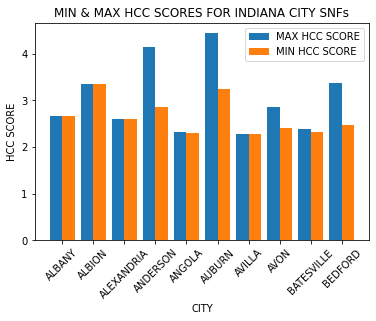

In [65]:

X = snfxpf['PRVDR_CITY']
y = snfxpf['MAX_SCORE']
z = snfxpf['MIN_SCORE']
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, y, 0.4, label = 'MAX HCC SCORE')
plt.bar(X_axis + 0.2, z, 0.4, label = 'MIN HCC SCORE')

plt.xticks(X_axis, X, rotation = 45)
plt.xlabel("CITY")
plt.ylabel("HCC SCORE")
plt.title("MIN & MAX HCC SCORES FOR INDIANA CITY SNFs")
plt.legend()
plt.show()

In [66]:
trace1 = go.Bar(
    x=snfxpe.PRVDR_CITY,
    y=snfxpe.MAX_SCORE,
    name='Max HCC Score',
    marker=dict(color='rgb(158,202,225)'),
)
trace2 = go.Bar(
    x=snfxpe.PRVDR_CITY,
    y=snfxpe.MIN_SCORE,
    name='Min HCC Score',
    marker=dict(color='rgb(58,22,25)'),
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group',
    title='Minimum and Maximum HCC scores for Indiana SNF facilities in different cities',
    legend=dict(orientation="h")
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='grouped-bar')

In [67]:
dfhos_ct=dfhos[dfhos['STATE']== 'IN']
hosxpa = pd.DataFrame().assign(PRVDR_CITY=dfhos_ct['PRVDR_CITY'], HCC_SCORE=dfhos_ct['BENE_AVG_RISK_SCRE'])
hosxp_avga = hosxpa.groupby(['PRVDR_CITY']).mean().reset_index()
hosxp_maxa = hosxpa.groupby(['PRVDR_CITY']).max().reset_index() 
hosxp_mina = hosxpa.groupby(['PRVDR_CITY']).min().reset_index() 
hosxpb = pd.merge(hosxp_avga, hosxp_maxa, how='left', left_on=['PRVDR_CITY'], right_on = ['PRVDR_CITY'])
hosxpc = pd.merge(hosxpb, hosxp_mina, how='left', left_on=['PRVDR_CITY'], right_on = ['PRVDR_CITY'])
hosxpd = pd.DataFrame().assign(PRVDR_CITY=hosxpc['PRVDR_CITY'],AVG_SCORE=hosxpc['HCC_SCORE_x'],MAX_SCORE=hosxpc['HCC_SCORE_y'],MIN_SCORE=hosxpc['HCC_SCORE'])
hosxpe = hosxpd[hosxpd.PRVDR_CITY != 'STATE TOTAL']
hosxpf = hosxpe[hosxpd.MIN_SCORE != 0.0]
hosxpf = hosxpf.head(10)
hosxpf


C:\Users\Nicole\AppData\Local\Temp/ipykernel_28560/1378202817.py:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



PRVDR_CITY  AVG_SCORE  MAX_SCORE  MIN_SCORE
0     ANDERSON   2.660000       2.66       2.66
1         AVON   2.500000       2.50       2.50
2   BATESVILLE   2.440000       2.44       2.44
3  BEECH GROVE   2.800000       2.80       2.80
4        BERNE   2.270000       2.27       2.27
5       CARMEL   2.623333       2.71       2.47
6     COLUMBUS   2.390000       2.39       2.39
7  CROWN POINT   2.560000       2.56       2.56
8   EVANSVILLE   2.594000       2.92       2.34
9   FORT WAYNE   2.342000       2.63       1.96

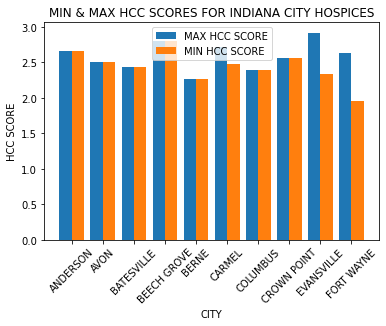

In [68]:
X = hosxpf['PRVDR_CITY']
y = hosxpf['MAX_SCORE']
z = hosxpf['MIN_SCORE']
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, y, 0.4, label = 'MAX HCC SCORE')
plt.bar(X_axis + 0.2, z, 0.4, label = 'MIN HCC SCORE')

plt.xticks(X_axis, X, rotation = 45)
plt.xlabel("CITY")
plt.ylabel("HCC SCORE")
plt.title("MIN & MAX HCC SCORES FOR INDIANA CITY HOSPICES")
plt.legend()
plt.show()

In [69]:
trace1 = go.Bar(
    x=hosxpe.PRVDR_CITY,
    y=hosxpe.MAX_SCORE,
    name='Max HCC Score',
    marker=dict(color='rgb(158,202,225)'),
)
trace2 = go.Bar(
    x=hosxpe.PRVDR_CITY,
    y=hosxpe.MIN_SCORE,
    name='Min HCC Score',
    marker=dict(color='rgb(58,22,25)'),
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group',
    title='Minimum and Maximum HCC scores for Indiana Hospice facilities in different cities',
    legend=dict(orientation="h")
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='grouped-bar')

### Q3. Distribution of Male and Female Beneficiaries across States and in Indiana

In [71]:
snfxpm = pd.DataFrame().assign(STATE=dfsnf['STATE'], MALE_PCT=dfsnf['BENE_MALE_PCT'], FEMALE_PCT=dfsnf['BENE_FEML_PCT'])
snfxpm2 = snfxpm.groupby(['STATE']).mean().reset_index()
snfxpm2 = snfxpm2[snfxpm2.STATE != 'NATIONAL TOTAL']
snfxpm2.head()

STATE  MALE_PCT  FEMALE_PCT
0    AK  0.295000    0.398000
1    AL  0.333390    0.531229
2    AR  0.352735    0.544933
3    AZ  0.445076    0.523030
4    CA  0.425573    0.500841

In [72]:
trace1 = go.Bar(
    x=snfxpm2.STATE,
    y=snfxpm2.MALE_PCT,
    marker=dict(color='#e584f7'),
    name='Percent Male beneficiaries'
)
trace2 = go.Bar(
    x=snfxpm2.STATE,
    y=snfxpm2.FEMALE_PCT,
    marker=dict(color='#a0f784'),
    name='Percent Female beneficiaries'
)

data = [trace1, trace2]
layout = go.Layout(barmode='group', legend=dict(orientation='h'), title='Percent of Male and Female Patients in 2020 in SNFs in different states')
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='grouped-bar')

In [79]:
snfxpf = pd.DataFrame().assign(PRVDR_CITY=dfsnf['PRVDR_CITY'], MALE_PCT=dfsnf['BENE_MALE_PCT'], FEMALE_PCT=dfsnf['BENE_FEML_PCT'])
snfxpf2 = snfxpf.groupby(['PRVDR_CITY']).mean().reset_index()
snfxpf2 = snfxpf2.sort_values(by = 'MALE_PCT', ascending=False)
snfxpf2 = snfxpf2[snfxpf2.FEMALE_PCT != 0.0]
snfxpf2 = snfxpf2.head(20)
snfxpf2.head()

PRVDR_CITY  MALE_PCT  FEMALE_PCT
4273      STONYBROOK      0.89        0.10
726   CHARLOTTE HALL      0.86        0.13
3844       RULEVILLE      0.76        0.24
585       BYROMVILLE      0.73        0.26
3631      PT ORCHARD      0.73        0.26

In [80]:
trace1 = go.Bar(
    x=snfxpf2.PRVDR_CITY,
    y=snfxpf2.MALE_PCT,
    marker=dict(color='#e584f7'),
    name='Percent Male beneficiaries'
)
trace2 = go.Bar(
    x=snfxpf2.PRVDR_CITY,
    y=snfxpf2.FEMALE_PCT,
    marker=dict(color='#a0f784'),
    name='Percent Female beneficiaries'
)

data = [trace1, trace2]
layout = go.Layout(barmode='group', legend=dict(orientation='h'), title='Percent of Male and Female Patients in 2020 in SNFs in the Top 20 Cities across the US')
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='grouped-bar')

In [81]:
hosxpm = pd.DataFrame().assign(STATE=dfhos['STATE'], MALE_PCT=dfhos['BENE_MALE_PCT'], FEMALE_PCT=dfhos['BENE_FEML_PCT'])
hosxpm2 = hosxpm.groupby(['STATE']).mean().reset_index()
hosxpm2 = hosxpm2[hosxpm2.STATE != 'NATIONAL TOTAL']
hosxpm2.head()

STATE  MALE_PCT  FEMALE_PCT
0    AK  0.468333    0.521667
1    AL  0.416022    0.563656
2    AR  0.416000    0.552444
3    AZ  0.396507    0.526027
4    CA  0.341559    0.473314

In [82]:
trace1 = go.Bar(
    x=hosxpm2.STATE,
    y=hosxpm2.MALE_PCT,
    marker=dict(color='#e584f7'),
    name='Percent Male beneficiaries'
)
trace2 = go.Bar(
    x=hosxpm2.STATE,
    y=hosxpm2.FEMALE_PCT,
    marker=dict(color='#a0f784'),
    name='Percent Female beneficiaries'
)

data = [trace1, trace2]
layout = go.Layout(barmode='group', legend=dict(orientation='h'), title='Percent of Male and Female Patients in 2020 in Hospices in STATES across the US')
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='grouped-bar')

In [85]:
hosxpf = pd.DataFrame().assign(PRVDR_CITY=dfhos['PRVDR_CITY'], MALE_PCT=dfhos['BENE_MALE_PCT'], FEMALE_PCT=dfhos['BENE_FEML_PCT'])
hosxpf2 = hosxpf.groupby(['PRVDR_CITY']).mean().reset_index()
hosxpf2 = hosxpf2.sort_values(by = 'MALE_PCT', ascending=False)
#hosxpf2 = hosxpf2[hosxpf2.FEMALE_PCT != 0.0]
hosxpf2 = hosxpf2.head(20)
hosxpf2.head()

PRVDR_CITY  MALE_PCT  FEMALE_PCT
458              EASLEY      0.69        0.30
1581  STEAMBOAT SPRINGS      0.62        0.37
682         HARBOR CITY      0.61        0.38
863              LANDER      0.60        0.39
895           LEWISTOWN      0.60        0.39

In [86]:
trace1 = go.Bar(
    x=hosxpf2.PRVDR_CITY,
    y=hosxpf2.MALE_PCT,
    marker=dict(color='#e584f7'),
    name='Percent Male beneficiaries'
)
trace2 = go.Bar(
    x=hosxpf2.PRVDR_CITY,
    y=hosxpf2.FEMALE_PCT,
    marker=dict(color='#a0f784'),
    name='Percent Female beneficiaries'
)

data = [trace1, trace2]
layout = go.Layout(barmode='group', legend=dict(orientation='h'), title='Percent of Male and Female Patients in 2020 in Hospices in the Top 20 Cities across the US')
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='grouped-bar')

### Q5. Access to Care by Ethnicity at national and State Levels

In [103]:
snf_ethnnt=dfsnf[dfsnf['STATE']== 'NATIONAL TOTAL']
snf_ethn = pd.DataFrame().assign(WHITE=snf_ethnnt['BENE_RACE_WHT_PCT'],ASIAN_PACIFIC_ISLANDER=snf_ethnnt['BENE_RACE_API_PCT'],HISPANIC=snf_ethnnt['BENE_RACE_HSPNC_PCT'],AMERICAN_INDIAN=snf_ethnnt['BENE_RACE_NATIND_PCT'],OTHER=snf_ethnnt['BENE_RACE_OTHR_PCT'],AFRICAN_AMERICAN=snf_ethnnt['BENE_RACE_BLACK_PCT'])
snf_ethn = snf_ethn.T
snf_ethn.columns=['Percent']
snf_ethn = snf_ethn.assign(Race=['WHITE', 'ASIAN_PACIFIC_ISLANDER', 'HISPANIC','AMERICAN_INDIAN','OTHER','AFRICAN_AMERICAN'])
snf_ethn

Percent                    Race
WHITE                      0.79                   WHITE
ASIAN_PACIFIC_ISLANDER     0.01  ASIAN_PACIFIC_ISLANDER
HISPANIC                   0.05                HISPANIC
AMERICAN_INDIAN            0.00         AMERICAN_INDIAN
OTHER                      0.01                   OTHER
AFRICAN_AMERICAN           0.11        AFRICAN_AMERICAN

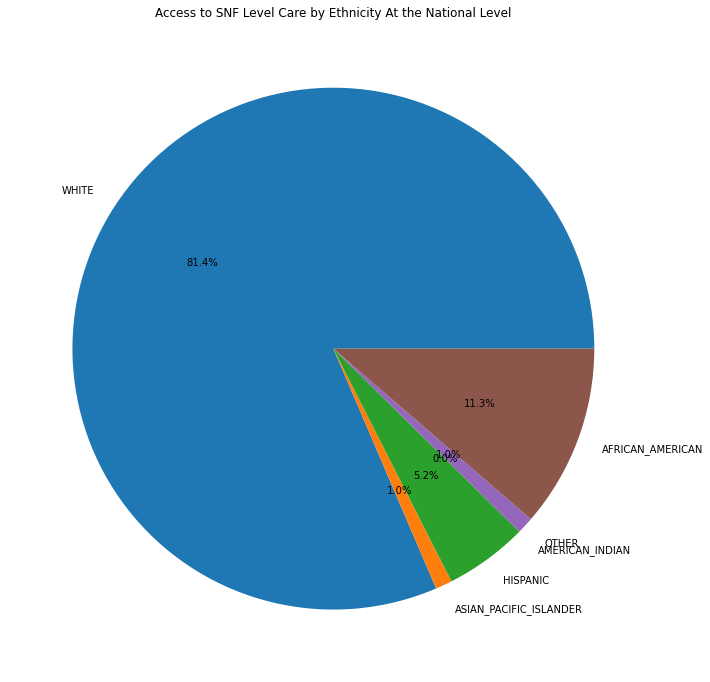

In [114]:
fig, sc = plt.subplots(figsize=(12, 12))
sc.pie(snf_ethn['Percent'], labels=snf_ethn['Race'], autopct='%.1f%%',normalize=True)
sc.set_title("Access to SNF Level Care by Ethnicity At the National Level")
plt.show()

In [117]:
#State wise Ethnicity distribution

snf_ethn_st = pd.DataFrame().assign(STATE=dfsnf['STATE'],WHITE=dfsnf['BENE_RACE_WHT_PCT'],ASIAN_PACIFIC_ISLANDER=dfsnf['BENE_RACE_API_PCT'],HISPANIC=dfsnf['BENE_RACE_HSPNC_PCT'],AMERICAN_INDIAN=dfsnf['BENE_RACE_NATIND_PCT'],OTHER=dfsnf['BENE_RACE_OTHR_PCT'],AFRICAN_AMERICAN=dfsnf['BENE_RACE_BLACK_PCT'])
snf_ethn_st2 = snf_ethn_st.groupby(['STATE']).mean().reset_index()
snf_ethn_st2.head()

STATE     WHITE  ASIAN_PACIFIC_ISLANDER  HISPANIC  AMERICAN_INDIAN  \
0    AK  0.753000                0.009000  0.002000         0.049000   
1    AL  0.740593                0.000000  0.000000         0.000000   
2    AR  0.846592                0.000000  0.000000         0.000224   
3    AZ  0.787803                0.000076  0.048258         0.049697   
4    CA  0.573226                0.064593  0.145296         0.000018   

      OTHER  AFRICAN_AMERICAN  
0  0.002000          0.003000  
1  0.000000          0.179449  
2  0.000000          0.089776  
3  0.000227          0.009394  
4  0.000998          0.071044

In [ ]:
# https://stackoverflow.com/questions/62328382/plotly-graph-objects-choropleth-map-subplots-with-shared-colorscale
# https://medium.com/analytics-vidhya/create-choropleth-maps-by-using-plotly-31771803da7

In [146]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import requests
import json

races = pd.DataFrame({'W': 'WHITE',
    'B': 'AFRICAN_AMERICAN',
    'H': 'HISPANIC',
    'API': 'ASIAN_PACIFIC_ISLANDER',
    'AI': 'AMERICAN_INDIAN',
    'O': 'OTHER'}, index=[0])

fig = subplots.make_subplots(
rows=2, cols=3,
specs=[
[{"type": "choropleth"},{"type": "choropleth"},{"type": "choropleth"}],
[{"type": "choropleth"},{"type": "choropleth"},{"type": "choropleth"}],
]
)
fig.add_trace(trace=go.Choropleth(
        locations=snf_ethn_st['STATE'],
        z = snf_ethn_st['WHITE'],
        locationmode = 'USA-states', 
        name='WHITE',
        marker_line_color='black',
        colorbar_title = "Percent",
        hoverinfo='location+z',
), row=1, col=1)
fig.add_trace(trace=go.Choropleth(
        locations=snf_ethn_st['STATE'],
        z = snf_ethn_st['AFRICAN_AMERICAN'],
        locationmode = 'USA-states', 
        name='AFRICAN_AMERICAN',
        marker_line_color='black',
        colorbar_title = "Percent",
        hoverinfo='location+z',
        showlegend=False,
        showscale=False,
), row=1, col=2)
fig.add_trace(trace=go.Choropleth(
        locations=snf_ethn_st['STATE'],
        z = snf_ethn_st['HISPANIC'],
        locationmode = 'USA-states', 
        name='HISPANIC',
        marker_line_color='black',
        colorbar_title = "Percent",
        hoverinfo='location+z',
        showlegend=False,
        showscale=False,
), row=1, col=3)
fig.add_trace(trace=go.Choropleth(
        locations=snf_ethn_st['STATE'],
        z = snf_ethn_st['ASIAN_PACIFIC_ISLANDER'],
        locationmode = 'USA-states', 
        name='ASIAN_PACIFIC_ISLANDER',
        marker_line_color='black',
        colorbar_title = "Percent",    
        hoverinfo='location+z',
        showlegend=False,
        showscale=False,
), row=2, col=1)
fig.add_trace(trace=go.Choropleth(
        locations=snf_ethn_st['STATE'],
        z = snf_ethn_st['AMERICAN_INDIAN'],
        locationmode = 'USA-states', 
        name='AMERICAN_INDIAN',
        marker_line_color='black',
        colorbar_title = "Percent", 
        hoverinfo='location+z',
        showlegend=False,
        showscale=False,
), row=2, col=2)
fig.add_trace(trace=go.Choropleth(
        locations=snf_ethn_st['STATE'],
        z = snf_ethn_st['OTHER'],
        locationmode = 'USA-states', 
        name='OTHER',
        marker_line_color='black',
        colorbar_title = "Percent",    
        hoverinfo='location+z',
        showlegend=False,
        showscale=False,
), row=2, col=3)
fig.update_geos(fitbounds="locations",
                visible=False,
                )
for race in races:
    fig.update_layout(
    title_text = races[race][0],
    geo_scope='usa',)

fig.update_layout(
    title='SNF Utilization by STATE and Ethnicity', title_x=0.5)
fig.show()


                         Percent                    Race
WHITE                   0.900155                   WHITE
ASIAN_PACIFIC_ISLANDER  0.000000  ASIAN_PACIFIC_ISLANDER
HISPANIC                0.001087                HISPANIC
AMERICAN_INDIAN         0.000000         AMERICAN_INDIAN
OTHER                   0.000000                   OTHER
AFRICAN_AMERICAN        0.039767        AFRICAN_AMERICAN


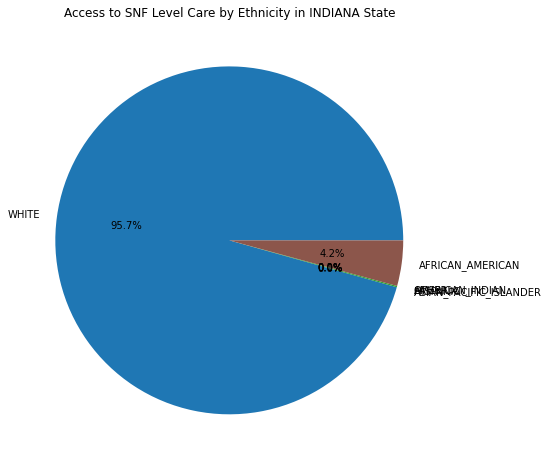

In [125]:
snf_ethn_in=dfsnf[dfsnf['STATE']== 'IN']
snf_ethnin = pd.DataFrame().assign(STATE=snf_ethn_in['STATE'],WHITE=snf_ethn_in['BENE_RACE_WHT_PCT'],ASIAN_PACIFIC_ISLANDER=snf_ethn_in['BENE_RACE_API_PCT'],HISPANIC=snf_ethn_in['BENE_RACE_HSPNC_PCT'],AMERICAN_INDIAN=snf_ethn_in['BENE_RACE_NATIND_PCT'],OTHER=snf_ethn_in['BENE_RACE_OTHR_PCT'],AFRICAN_AMERICAN=snf_ethn_in['BENE_RACE_BLACK_PCT'])
snf_ethnin2 = snf_ethnin.groupby(['STATE']).mean().reset_index()
snf_ethnin3 = pd.DataFrame().assign(WHITE=snf_ethnin2['WHITE'],ASIAN_PACIFIC_ISLANDER=snf_ethnin2['ASIAN_PACIFIC_ISLANDER'],HISPANIC=snf_ethnin2['HISPANIC'],AMERICAN_INDIAN=snf_ethnin2['AMERICAN_INDIAN'],OTHER=snf_ethnin2['OTHER'],AFRICAN_AMERICAN=snf_ethnin2['AFRICAN_AMERICAN'])
snf_ethnin3 = snf_ethnin3.T
snf_ethnin3.columns=['Percent']
snf_ethnin3 = snf_ethnin3.assign(Race=['WHITE', 'ASIAN_PACIFIC_ISLANDER', 'HISPANIC','AMERICAN_INDIAN','OTHER','AFRICAN_AMERICAN'])
print(snf_ethnin3)

fig, sc = plt.subplots(figsize=(8, 8))
sc.pie(snf_ethnin3['Percent'], labels=snf_ethnin3['Race'], autopct='%.1f%%',normalize=True)
sc.set_title("Access to SNF Level Care by Ethnicity in INDIANA State")
plt.show()

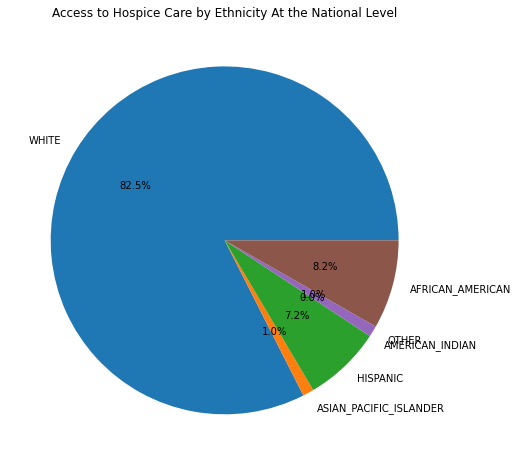

In [126]:
hos_ethnnt=dfhos[dfhos['STATE']== 'NATIONAL TOTAL']
hos_ethn = pd.DataFrame().assign(WHITE=hos_ethnnt['BENE_RACE_WHT_PCT'],ASIAN_PACIFIC_ISLANDER=hos_ethnnt['BENE_RACE_API_PCT'],HISPANIC=hos_ethnnt['BENE_RACE_HSPNC_PCT'],AMERICAN_INDIAN=hos_ethnnt['BENE_RACE_NATIND_PCT'],OTHER=hos_ethnnt['BENE_RACE_OTHR_PCT'],AFRICAN_AMERICAN=hos_ethnnt['BENE_RACE_BLACK_PCT'])
hos_ethn = hos_ethn.T
hos_ethn.columns=['Percent']
hos_ethn = hos_ethn.assign(Race=['WHITE', 'ASIAN_PACIFIC_ISLANDER', 'HISPANIC','AMERICAN_INDIAN','OTHER','AFRICAN_AMERICAN'])
hos_ethn


fig, sc = plt.subplots(figsize=(8, 8))
sc.pie(hos_ethn['Percent'], labels=hos_ethn['Race'], autopct='%.1f%%',normalize=True)
sc.set_title("Access to Hospice Care by Ethnicity At the National Level")
plt.show()

In [130]:
hos_ethn_st = pd.DataFrame().assign(STATE=dfhos['STATE'],WHITE=dfhos['BENE_RACE_WHT_PCT'],ASIAN_PACIFIC_ISLANDER=dfhos['BENE_RACE_API_PCT'],HISPANIC=dfhos['BENE_RACE_HSPNC_PCT'],AMERICAN_INDIAN=dfhos['BENE_RACE_NATIND_PCT'],OTHER=dfhos['BENE_RACE_OTHR_PCT'],AFRICAN_AMERICAN=dfhos['BENE_RACE_BLACK_PCT'])
hos_ethn_st2 = hos_ethn_st.groupby(['STATE']).mean().reset_index()
hos_ethn_st2.head()


STATE     WHITE  ASIAN_PACIFIC_ISLANDER  HISPANIC  AMERICAN_INDIAN  \
0    AK  0.726667                0.023333  0.018333         0.106667   
1    AL  0.796774                0.000000  0.000000         0.000000   
2    AR  0.855778                0.000000  0.000889         0.001111   
3    AZ  0.817808                0.000411  0.072260         0.009795   
4    CA  0.516265                0.050490  0.157186         0.000039   

      OTHER  AFRICAN_AMERICAN  
0  0.003333          0.003333  
1  0.000000          0.169892  
2  0.000000          0.108667  
3  0.000411          0.007055  
4  0.000804          0.041588

                         Percent                    Race
WHITE                   0.920964                   WHITE
ASIAN_PACIFIC_ISLANDER  0.000000  ASIAN_PACIFIC_ISLANDER
HISPANIC                0.004096                HISPANIC
AMERICAN_INDIAN         0.000000         AMERICAN_INDIAN
OTHER                   0.000361                   OTHER
AFRICAN_AMERICAN        0.040120        AFRICAN_AMERICAN


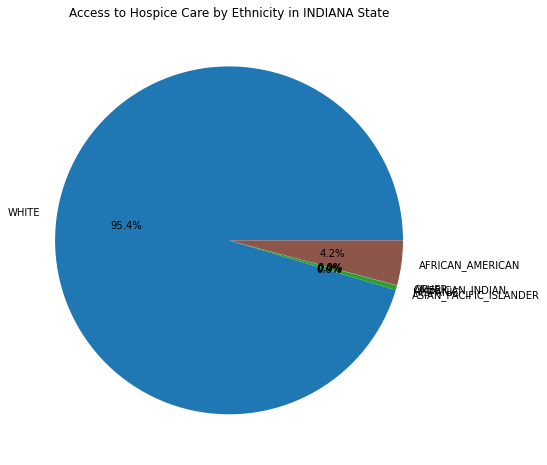

In [129]:
hos_ethn_in=dfhos[dfhos['STATE']== 'IN']
hos_ethnin = pd.DataFrame().assign(STATE=hos_ethn_in['STATE'],WHITE=hos_ethn_in['BENE_RACE_WHT_PCT'],ASIAN_PACIFIC_ISLANDER=hos_ethn_in['BENE_RACE_API_PCT'],HISPANIC=hos_ethn_in['BENE_RACE_HSPNC_PCT'],AMERICAN_INDIAN=hos_ethn_in['BENE_RACE_NATIND_PCT'],OTHER=hos_ethn_in['BENE_RACE_OTHR_PCT'],AFRICAN_AMERICAN=hos_ethn_in['BENE_RACE_BLACK_PCT'])
hos_ethnin2 = hos_ethnin.groupby(['STATE']).mean().reset_index()
hos_ethnin3 = pd.DataFrame().assign(WHITE=hos_ethnin2['WHITE'],ASIAN_PACIFIC_ISLANDER=hos_ethnin2['ASIAN_PACIFIC_ISLANDER'],HISPANIC=hos_ethnin2['HISPANIC'],AMERICAN_INDIAN=hos_ethnin2['AMERICAN_INDIAN'],OTHER=hos_ethnin2['OTHER'],AFRICAN_AMERICAN=hos_ethnin2['AFRICAN_AMERICAN'])
hos_ethnin3 = hos_ethnin3.T
hos_ethnin3.columns=['Percent']
hos_ethnin3 = hos_ethnin3.assign(Race=['WHITE', 'ASIAN_PACIFIC_ISLANDER', 'HISPANIC','AMERICAN_INDIAN','OTHER','AFRICAN_AMERICAN'])
print(hos_ethnin3)

fig, sc = plt.subplots(figsize=(8, 8))
sc.pie(hos_ethnin3['Percent'], labels=hos_ethnin3['Race'], autopct='%.1f%%',normalize=True)
sc.set_title("Access to Hospice Care by Ethnicity in INDIANA State")
plt.show()